# Exploratory Data Analysis

### Setup and Library Imports – Explanation

This setup block initializes the environment for analysis and clustering:

- **Data Manipulation**: `pandas` and `numpy` are imported to handle structured data and numerical operations.
- **Visualization**: `matplotlib.pyplot` and `seaborn` are used to create charts, such as histograms, scatter plots, and heatmaps to explore and communicate patterns in the data.
- **Display**: `IPython.display.display` is included to format data tables neatly inside Jupyter notebooks or notebooks-based environments.
- **Feature Scaling**: `StandardScaler` from `sklearn.preprocessing` is used to standardize numeric features by removing the mean and scaling to unit variance, which is essential before applying distance-based algorithms like KMeans.
- **Clustering**: `KMeans` is imported from `sklearn.cluster` to perform unsupervised clustering, identifying groups of similar data points.
- **Display Settings**: The command to display up to 200 columns ensures that when wide dataframes are printed, all columns are visible for inspection.

This setup ensures that the environment is ready for data cleaning, visualization, scaling, and clustering tasks.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.set_option('display.max_columns',200)

### Data Loading and Copying

- The dataset `player_stats.csv` is loaded into a DataFrame named `data` using `pandas.read_csv()`.
- A copy of this dataset is created and stored in `df` to ensure the original data remains unchanged during any cleaning or transformation steps.
  
This practice allows safe experimentation and preprocessing on `df` while retaining `data` as a clean backup reference.


In [3]:
data=pd.read_csv('player_stats.csv')
df=data.copy()

In [4]:
df.head()

,Rank,Player,Nationality,Position,Club,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90
0,1,Max Aarons,ENG,DF,Bournemouth,25.0,2000.0,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,Joshua Acheampong,ENG,DF,Chelsea,18.0,2006.0,4,2,170,1.9,0,0,0,0,0,0,1,0,0.2,0.2,0.0,0.2,0,8,0,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12
2,3,Tyler Adams,USA,MF,Bournemouth,26.0,1999.0,21,14,1380,15.3,0,3,3,0,0,0,4,0,1.2,1.2,0.8,2.0,11,54,7,0.00,0.20,0.20,0.00,0.20,0.08,0.05,0.13,0.08,0.13
3,4,Tosin Adarabioyo,ENG,DF,Chelsea,27.0,1997.0,18,12,1182,13.1,1,1,2,1,0,0,3,0,0.9,0.9,0.2,1.1,5,34,1,0.08,0.08,0.15,0.08,0.15,0.07,0.02,0.09,0.07,0.09
4,5,Simon Adingra,CIV,"FW,MF",Brighton,23.0,2002.0,22,7,743,8.3,2,1,3,2,0,0,0,0,1.6,1.6,1.4,3.0,27,12,96,0.24,0.12,0.36,0.24,0.36,0.19,0.17,0.36,0.19,0.36


In [5]:
df.columns

Index(['Rank', 'Player', 'Nationality', 'Position', 'Club', 'Age', 'BirthYear',
       'MatchesPlayed', 'MatchesStarted', 'MinutesPlayed', 'MatchesPlayed_90s',
       'Goals_Total', 'Assists_Total', 'GoalsPlusAssists', 'NonPenaltyGoals',
       'PenaltyGoals', 'PenaltyAttempts', 'YellowCards', 'RedCards',
       'xG_Total', 'NonPenalty_xG', 'xAG_Total', 'NonPenalty_xG_plus_xAG',
       'ProgressiveCarries', 'ProgressivePasses', 'ProgressivePassesReceived',
       'Goals_Total_per90', 'Assists_Total_per90', 'GoalsPlusAssists_per90',
       'NonPenaltyGoals_per90', 'G+A_ExclPK', 'xG_Total_per90',
       'xAG_Total_per90', 'xG_plus_xAG', 'NonPenalty_xG_per90',
       'NonPenalty_xG_plus_xAG_per90'],
      dtype='object')

# Checking Missing Values

In [6]:
df.isna().sum()

Rank                            0
Player                          0
Nationality                     1
Position                        0
Club                            0
Age                             1
BirthYear                       1
MatchesPlayed                   0
MatchesStarted                  0
MinutesPlayed                   0
MatchesPlayed_90s               0
Goals_Total                     0
Assists_Total                   0
GoalsPlusAssists                0
NonPenaltyGoals                 0
PenaltyGoals                    0
PenaltyAttempts                 0
YellowCards                     0
RedCards                        0
xG_Total                        0
NonPenalty_xG                   0
xAG_Total                       0
NonPenalty_xG_plus_xAG          0
ProgressiveCarries              0
ProgressivePasses               0
ProgressivePassesReceived       0
Goals_Total_per90               0
Assists_Total_per90             0
GoalsPlusAssists_per90          0
NonPenaltyGoal

### Missing Value Inspection

The `.isna().sum()` function is used to identify how many missing (`NA`) values exist in each column of the dataset.

- Most columns have **zero missing values**, indicating a generally complete dataset.
- A few columns such as `Nationality`, `Age`, and `BirthYear` have **only 1 missing value each**.
  
This low level of missingness suggests minimal imputation or row removal may be needed. These columns can either be:
- Filled with a reasonable default or mode (e.g., most common nationality or average age), or
- Removed if the missing data point does not significantly affect analysis.

This check is a standard step before performing further data cleaning or modeling.


In [7]:
df[df.Age.isna()]

,Rank,Player,Nationality,Position,Club,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90
346,347,Jeremy Monga,NaN,FW,Leicester City,NaN,NaN,1,0,17,0.2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Handling Missing Age and Birth Year

- First, the row(s) with missing `Age` are viewed using `df[df.Age.isna()]` to inspect the affected records.
- The missing `Age` value is then filled using the **mean age** of the dataset. This is a common imputation technique that maintains overall distribution without introducing bias.





In [8]:
df['Age'].fillna(int(df['Age'].mean()),inplace=True)

C:\Users\agtbe\AppData\Local\Temp\ipykernel_9276\1930370912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(int(df['Age'].mean()),inplace=True)


The `BirthYear` is imputed using a derived formula:  
  `BirthYear = 2025 - Age`,  
  assuming the current year is 2025. This back-calculates birth year from the newly imputed age, ensuring internal consistency.

In [9]:
df['BirthYear']=df['BirthYear'].fillna(2025-df['Age'])

In [10]:
df[df.Player=='Jeremy Monga']

,Rank,Player,Nationality,Position,Club,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90
346,347,Jeremy Monga,NaN,FW,Leicester City,25.0,2000.0,1,0,17,0.2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Checking Data types

In [11]:
df.dtypes

Rank                              int64
Player                           object
Nationality                      object
Position                         object
Club                             object
Age                             float64
BirthYear                       float64
MatchesPlayed                     int64
MatchesStarted                    int64
MinutesPlayed                     int64
MatchesPlayed_90s               float64
Goals_Total                       int64
Assists_Total                     int64
GoalsPlusAssists                  int64
NonPenaltyGoals                   int64
PenaltyGoals                      int64
PenaltyAttempts                   int64
YellowCards                       int64
RedCards                          int64
xG_Total                        float64
NonPenalty_xG                   float64
xAG_Total                       float64
NonPenalty_xG_plus_xAG          float64
ProgressiveCarries                int64
ProgressivePasses                 int64


### Converting Age and BirthYear to Integer

After handling missing values, both `Age` and `BirthYear` columns are explicitly converted to integers using the `Int64` dtype.

- `Int64` (with capital 'I') is **Pandas’ nullable integer type**, which allows the column to hold both integers and `NA` values if necessary.
- This ensures that the data is in the correct format for numerical operations, comparisons, and visualizations.

Converting these fields to integer types enhances memory efficiency and ensures compatibility with mathematical operations or model input requirements.


In [12]:
#converting age and birthyear to int
df['Age'] = df['Age'].astype('Int64')  # Pandas nullable int
df['BirthYear'] = df['BirthYear'].astype('Int64')

# Descriptive Statistics

In [13]:
df.describe()

,Rank,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90
count,559.000000,559.0,559.0,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,280.000000,25.90161,1998.431127,16.787120,12.161002,1092.574240,12.139177,1.583184,1.168157,2.751342,1.481216,0.101968,0.118068,2.359571,0.071556,1.614669,1.520572,1.193202,2.713775,20.812165,40.974955,40.561717,0.134830,0.083703,0.218390,0.130322,0.213810,0.149231,0.095707,0.244866,0.144973,0.240555
std,161.513673,4.407063,4.4159,10.062143,10.264557,875.031103,9.721890,3.098121,1.942817,4.517675,2.734865,0.623879,0.653372,2.384510,0.278043,2.744992,2.443371,1.659346,3.721608,27.388394,44.821303,56.717650,0.563903,0.166154,0.596724,0.561685,0.593538,0.318784,0.127661,0.358515,0.315732,0.354808
min,1.000000,17.0,1985.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.500000,23.0,1996.0,7.000000,2.000000,268.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.200000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.040000,0.010000,0.040000
50%,280.000000,26.0,1999.0,18.000000,10.000000,917.000000,10.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.500000,0.500000,0.500000,1.200000,10.000000,26.000000,13.000000,0.000000,0.000000,0.070000,0.000000,0.070000,0.070000,0.060000,0.140000,0.070000,0.140000
75%,419.500000,29.0,2002.0,26.000000,21.000000,1845.000000,20.500000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,4.000000,0.000000,1.750000,1.750000,1.600000,3.700000,30.000000,60.500000,65.000000,0.145000,0.125000,0.290000,0.140000,0.275000,0.190000,0.140000,0.350000,0.170000,0.345000
max,559.000000,39.0,2007.0,31.000000,31.000000,2790.000000,31.000000,27.000000,17.000000,44.000000,19.000000,9.000000,9.000000,12.000000,2.000000,22.500000,18.400000,11.300000,26.800000,166.000000,251.000000,384.000000,11.250000,2.650000,11.250000,11.250000,11.250000,5.060000,1.450000,5.060000,5.060000,5.060000


In [14]:
performance_cols = [
    'Goals_Total', 'Assists_Total', 'GoalsPlusAssists', 'NonPenaltyGoals',
    'PenaltyGoals', 'xG_Total', 'xAG_Total', 'xG_plus_xAG',
    'Goals_Total_per90', 'Assists_Total_per90', 'xG_Total_per90', 'xAG_Total_per90'
]

df[performance_cols].describe()

,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,xG_Total,xAG_Total,xG_plus_xAG,Goals_Total_per90,Assists_Total_per90,xG_Total_per90,xAG_Total_per90
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,1.583184,1.168157,2.751342,1.481216,0.101968,1.614669,1.193202,0.244866,0.134830,0.083703,0.149231,0.095707
std,3.098121,1.942817,4.517675,2.734865,0.623879,2.744992,1.659346,0.358515,0.563903,0.166154,0.318784,0.127661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.040000,0.000000,0.000000,0.010000,0.010000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.500000,0.140000,0.000000,0.000000,0.070000,0.060000
75%,2.000000,2.000000,3.000000,2.000000,0.000000,1.750000,1.600000,0.350000,0.145000,0.125000,0.190000,0.140000
max,27.000000,17.000000,44.000000,19.000000,9.000000,22.500000,11.300000,5.060000,11.250000,2.650000,5.060000,1.450000


### Summary of Player Performance Metrics

A subset of key performance columns was selected for statistical analysis, including total goals, assists, expected goals (xG), and their per-90-minute equivalents.



- **Goals & Assists**:  
  - The average player scored **1.58 goals** and provided **1.17 assists** over the season.
  - The maximum goals scored by a single player was **27**, while assists peaked at **17**.
  - About 50% of players had **0 goals or assists**, indicating a highly skewed distribution.

- **Expected Goals (xG/xAG)**:  
  - Mean xG was **1.61**, and xAG (expected assists) was **1.19**, aligning closely with actual performance.
  - Some players reached an xG of **22.5**, reflecting heavy goal-scoring opportunities.

- **Per 90-Minute Stats**:  
  - Most players had low per-90 rates, with **median values near 0**, and **upper quartiles** around 0.1–0.14.
  - Outliers exist with **per-90 goal rates up to 11.25**, indicating extremely effective players with limited minutes.

- **Penalty Goals**:  
  - Most players (75%) did not take penalties.
  - A small subset took and scored multiple penalties, with a max of **9**.

These statistics reveal a highly imbalanced distribution where a few high-performing players dominate key metrics, while the majority contribute modestly.


In [15]:
df.describe(include='all')

,Rank,Player,Nationality,Position,Club,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90
count,559.000000,559,558,559,559,559.0,559.0,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
unique,NaN,547,64,10,20,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Carlos Alcaraz,ENG,DF,Southampton,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,190,181,34,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,280.000000,NaN,NaN,NaN,NaN,25.90161,1998.431127,16.787120,12.161002,1092.574240,12.139177,1.583184,1.168157,2.751342,1.481216,0.101968,0.118068,2.359571,0.071556,1.614669,1.520572,1.193202,2.713775,20.812165,40.974955,40.561717,0.134830,0.083703,0.218390,0.130322,0.213810,0.149231,0.095707,0.244866,0.144973,0.240555
std,161.513673,NaN,NaN,NaN,NaN,4.407063,4.4159,10.062143,10.264557,875.031103,9.721890,3.098121,1.942817,4.517675,2.734865,0.623879,0.653372,2.384510,0.278043,2.744992,2.443371,1.659346,3.721608,27.388394,44.821303,56.717650,0.563903,0.166154,0.596724,0.561685,0.593538,0.318784,0.127661,0.358515,0.315732,0.354808
min,1.000000,NaN,NaN,NaN,NaN,17.0,1985.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.500000,NaN,NaN,NaN,NaN,23.0,1996.0,7.000000,2.000000,268.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.200000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.040000,0.010000,0.040000
50%,280.000000,NaN,NaN,NaN,NaN,26.0,1999.0,18.000000,10.000000,917.000000,10.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.500000,0.500000,0.500000,1.200000,10.000000,26.000000,13.000000,0.000000,0.000000,0.070000,0.000000,0.070000,0.070000,0.060000,0.140000,0.070000,0.140000
75%,419.500000,NaN,NaN,NaN,NaN,29.0,2002.0,26.000000,21.000000,1845.000000,20.500000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,4.000000,0.000000,1.750000,1.750000,1.600000,3.700000,30.000000,60.500000,65.000000,0.145000,0.125000,0.290000,0.140000,0.275000,0.190000,0.140000,0.350000,0.170000,0.345000


In [16]:
df.groupby('Position')[performance_cols].mean()

,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,xG_Total,xAG_Total,xG_plus_xAG,Goals_Total_per90,Assists_Total_per90,xG_Total_per90,xAG_Total_per90
Position,,,,,,,,,,,,
DF,0.508287,0.668508,1.176796,0.508287,0.000000,0.634807,0.748619,0.098177,0.025580,0.037680,0.052376,0.046133
"DF,FW",0.428571,0.857143,1.285714,0.428571,0.000000,0.642857,0.957143,0.265714,0.035714,0.045714,0.064286,0.200000
"DF,MF",0.470588,0.470588,0.941176,0.470588,0.000000,0.376471,0.558824,0.132353,0.054118,0.032353,0.077059,0.056471
FW,4.702381,1.892857,6.595238,4.273810,0.428571,4.459524,1.850000,0.433810,0.279405,0.121905,0.296905,0.137381
"FW,DF",0.833333,0.333333,1.166667,0.833333,0.000000,0.550000,0.433333,0.270000,0.298333,0.095000,0.151667,0.120000
"FW,MF",2.448276,2.051724,4.500000,2.344828,0.103448,2.468966,1.877586,0.434483,0.195172,0.228966,0.269483,0.165862
GK,0.000000,0.170732,0.170732,0.000000,0.000000,0.002439,0.075610,0.003659,0.000000,0.006341,0.000000,0.003659
MF,1.214286,1.294643,2.508929,1.151786,0.062500,1.357143,1.405357,0.302054,0.169375,0.075446,0.180357,0.121339
"MF,DF",1.090909,1.181818,2.272727,1.090909,0.000000,1.109091,1.172727,0.199091,0.596364,0.065455,0.104545,0.092727


In [17]:
df.groupby('Club')[performance_cols].sum().sort_values('Goals_Total', ascending=False)


,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,xG_Total,xAG_Total,xG_plus_xAG,Goals_Total_per90,Assists_Total_per90,xG_Total_per90,xAG_Total_per90
Club,,,,,,,,,,,,
Liverpool,72,54,126,63,9,69.8,49.9,7.33,3.55,3.29,4.47,2.83
Manchester City,56,41,97,54,2,55.0,44.6,6.82,4.45,2.43,3.95,2.85
Tottenham,55,43,98,53,2,51.5,38.8,6.76,3.57,5.89,3.84,2.91
Arsenal,54,43,97,52,2,50.5,38.0,8.82,3.42,2.89,5.81,2.98
Chelsea,53,41,94,50,3,59.6,45.6,13.33,3.00,3.75,9.11,4.25
Brentford,51,32,83,46,5,48.5,34.9,5.14,2.30,1.54,2.96,2.19
Newcastle Utd,51,38,89,48,3,51.2,36.9,5.48,2.78,2.13,3.27,2.24
Bournemouth,50,37,87,44,6,58.3,38.8,7.76,3.24,2.42,4.58,3.21
Nott'ham Forest,50,36,86,47,3,39.5,28.6,4.59,2.75,2.13,2.59,2.00


### Club-Wise Performance Summary

The dataset was grouped by `Club`, and key performance metrics were aggregated using `.sum()`. The result was sorted by `Goals_Total` in descending order to identify the most offensively productive teams.

#### Key Observations:

- **Liverpool** leads the league with **72 total goals**, followed closely by **Manchester City (56)** and **Tottenham (55)**.
- **Chelsea**, while not leading in goals, recorded the **highest xG_plus_xAG value (13.33)**, indicating strong overall attacking potential.
- **Arsenal** and **Tottenham** show high `GoalsPlusAssists` totals (97 and 98), suggesting balanced contributions across players.
- **Crystal Palace** has a low overall goal count (**37**), but a strikingly high `Goals_Total_per90` (**19.08**), indicating one or two highly efficient players.

#### Insights:

- Clubs like **Manchester City** and **Liverpool** not only scored the most goals but also had high xG values, showing they created a large number of quality chances.
- Teams like **Bournemouth** and **Aston Villa** also show efficient scoring based on their xG-per-90 values.
- **Southampton**, **Leicester City**, and **Everton** are among the lower performers in both actual goals and expected goal metrics.

This club-level aggregation highlights the relative attacking strengths and playing styles of different teams based on both actual outcomes and advanced metrics like xG and xAG.


In [18]:
df.groupby('Club')[performance_cols].mean().sort_values('Goals_Total', ascending=False)


,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,xG_Total,xAG_Total,xG_plus_xAG,Goals_Total_per90,Assists_Total_per90,xG_Total_per90,xAG_Total_per90
Club,,,,,,,,,,,,
Liverpool,3.000000,2.250000,5.250000,2.625000,0.375000,2.908333,2.079167,0.305417,0.147917,0.137083,0.186250,0.117917
Arsenal,2.250000,1.791667,4.041667,2.166667,0.083333,2.104167,1.583333,0.367500,0.142500,0.120417,0.242083,0.124167
Nott'ham Forest,2.173913,1.565217,3.739130,2.043478,0.130435,1.717391,1.243478,0.199565,0.119565,0.092609,0.112609,0.086957
Newcastle Utd,2.125000,1.583333,3.708333,2.000000,0.125000,2.133333,1.537500,0.228333,0.115833,0.088750,0.136250,0.093333
Manchester City,1.931034,1.413793,3.344828,1.862069,0.068966,1.896552,1.537931,0.235172,0.153448,0.083793,0.136207,0.098276
Brentford,1.888889,1.185185,3.074074,1.703704,0.185185,1.796296,1.292593,0.190370,0.085185,0.057037,0.109630,0.081111
Chelsea,1.827586,1.413793,3.241379,1.724138,0.103448,2.055172,1.572414,0.459655,0.103448,0.129310,0.314138,0.146552
Bournemouth,1.785714,1.321429,3.107143,1.571429,0.214286,2.082143,1.385714,0.277143,0.115714,0.086429,0.163571,0.114643
Tottenham,1.774194,1.387097,3.161290,1.709677,0.064516,1.661290,1.251613,0.218065,0.115161,0.190000,0.123871,0.093871


# Feature Engineering

### Feature Engineering Summary

A custom function was defined to engineer additional performance-based features for each player. These new features offer deeper insights into efficiency, style of play, and role-based behavior.

#### Key Feature Categories:

- **Conversion Efficiency**
  - `GoalConversion`: Ratio of actual goals to expected goals (xG), capturing finishing efficiency.
  - `AssistEfficiency`: Ratio of actual assists to expected assists (xAG), measuring playmaking efficiency.

- **Over/Underperformance**
  - `xG_Difference` and `xAG_Difference`: Difference between actual and expected outcomes, showing whether a player is exceeding or underperforming expectations.

- **Finishing Tier**
  - Categorical tier (`Underperforming`, `Expected`, `Good Finisher`, `Elite`) based on `xG_Difference`.

- **Per 90-Minute Ratios**
  - `Goals_per90_calc`, `Assists_per90_calc`, `xG_per90_calc`, and `xAG_per90_calc`: Normalized rates of contributions per 90 minutes to account for playing time.

- **Attacking Score**
  - A custom weighted metric combining goals, assists, and xG per 90 minutes to evaluate overall attacking impact:
    - 60% weight on goals, 40% on assists, 30% on xG.

- **Aggression Index**
  - Combines yellow and red cards, normalized per 90 minutes, to measure on-field discipline or aggression.

- **Positional Flags**
  - Binary indicators for player roles: forward, midfielder, defender, and goalkeeper, based on the `Position` column.

These features enhance the dataset by quantifying player performance more holistically, making it suitable for clustering, ranking, or modeling.


In [19]:
def engineer_features(df):
    # Handle division safely
    def safe_divide(a, b):
        return np.where(b != 0, a / b, 0)

    # Conversion Efficiency Metrics
    df['GoalConversion'] = safe_divide(df['Goals_Total'], df['xG_Total'])
    df['AssistEfficiency'] = safe_divide(df['Assists_Total'], df['xAG_Total'])

    # Over/Underperformance
    df['xG_Difference'] = df['Goals_Total'] - df['xG_Total']
    df['xAG_Difference'] = df['Assists_Total'] - df['xAG_Total']

    # Finishing Tiers
    df['FinishingTier'] = pd.cut(
        df['xG_Difference'],
        bins=[-np.inf, -2, 0, 2, np.inf],
        labels=['Underperforming', 'Expected', 'Good Finisher', 'Elite']
    )

    # Per 90-minute Ratios (in case not already present)
    df['Goals_per90_calc'] = safe_divide(df['Goals_Total'], df['MatchesPlayed_90s'])
    df['Assists_per90_calc'] = safe_divide(df['Assists_Total'], df['MatchesPlayed_90s'])
    df['xG_per90_calc'] = safe_divide(df['xG_Total'], df['MatchesPlayed_90s'])
    df['xAG_per90_calc'] = safe_divide(df['xAG_Total'], df['MatchesPlayed_90s'])

    # Attacking Score (weighted custom metric)
    df['AttackingScore'] = (
        df['Goals_Total_per90'] * 0.6 +
        df['Assists_Total_per90'] * 0.4 +
        df['xG_Total_per90'] * 0.3
    )

    # Aggression Index (card behavior)
    df['AggressionIndex'] = safe_divide(
        df['YellowCards'] + 2 * df['RedCards'],
        df['MatchesPlayed_90s']
    )

    # Positional Flags
    df['IsForward'] = df['Position'].str.contains('FW', na=False).astype(int)
    df['IsMidfielder'] = df['Position'].str.contains('MF', na=False).astype(int)
    df['IsDefender'] = df['Position'].str.contains('DF', na=False).astype(int)
    df['IsGoalkeeper'] = df['Position'].str.contains('GK', na=False).astype(int)

    return df

In [20]:
df = engineer_features(df)

In [21]:
df.head()

,Rank,Player,Nationality,Position,Club,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90,GoalConversion,AssistEfficiency,xG_Difference,xAG_Difference,FinishingTier,Goals_per90_calc,Assists_per90_calc,xG_per90_calc,xAG_per90_calc,AttackingScore,AggressionIndex,IsForward,IsMidfielder,IsDefender,IsGoalkeeper
0,1,Max Aarons,ENG,DF,Bournemouth,25,2000,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.0,0.0,Expected,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0,0,1,0
1,2,Joshua Acheampong,ENG,DF,Chelsea,18,2006,4,2,170,1.9,0,0,0,0,0,0,1,0,0.2,0.2,0.0,0.2,0,8,0,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12,0.000000,0.000000,-0.2,0.0,Expected,0.000000,0.000000,0.105263,0.000000,0.036,0.526316,0,0,1,0
2,3,Tyler Adams,USA,MF,Bournemouth,26,1999,21,14,1380,15.3,0,3,3,0,0,0,4,0,1.2,1.2,0.8,2.0,11,54,7,0.00,0.20,0.20,0.00,0.20,0.08,0.05,0.13,0.08,0.13,0.000000,3.750000,-1.2,2.2,Expected,0.000000,0.196078,0.078431,0.052288,0.104,0.261438,0,1,0,0
3,4,Tosin Adarabioyo,ENG,DF,Chelsea,27,1997,18,12,1182,13.1,1,1,2,1,0,0,3,0,0.9,0.9,0.2,1.1,5,34,1,0.08,0.08,0.15,0.08,0.15,0.07,0.02,0.09,0.07,0.09,1.111111,5.000000,0.1,0.8,Good Finisher,0.076336,0.076336,0.068702,0.015267,0.101,0.229008,0,0,1,0
4,5,Simon Adingra,CIV,"FW,MF",Brighton,23,2002,22,7,743,8.3,2,1,3,2,0,0,0,0,1.6,1.6,1.4,3.0,27,12,96,0.24,0.12,0.36,0.24,0.36,0.19,0.17,0.36,0.19,0.36,1.250000,0.714286,0.4,-0.4,Good Finisher,0.240964,0.120482,0.192771,0.168675,0.249,0.000000,1,1,0,0


# Correlation Analysis

In [22]:
df.corr(numeric_only=True).round(2)

,Rank,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90,GoalConversion,AssistEfficiency,xG_Difference,xAG_Difference,Goals_per90_calc,Assists_per90_calc,xG_per90_calc,xAG_per90_calc,AttackingScore,AggressionIndex,IsForward,IsMidfielder,IsDefender,IsGoalkeeper
Rank,1.00,0.09,-0.10,0.04,0.03,0.04,0.04,0.06,0.06,0.07,0.06,0.05,0.05,0.03,0.01,0.07,0.07,0.04,0.07,0.03,0.01,0.06,-0.02,0.08,0.00,-0.02,-0.00,-0.01,-0.00,-0.01,-0.01,-0.01,-0.04,0.04,0.00,0.05,-0.02,0.08,-0.05,0.01,-0.01,-0.07,0.01,0.00,-0.05,0.07
Age,0.09,1.00,-0.99,0.15,0.17,0.17,0.17,0.03,0.05,0.04,0.02,0.06,0.06,0.11,0.03,0.04,0.03,0.04,0.04,-0.07,0.06,-0.03,-0.08,-0.02,-0.08,-0.08,-0.08,-0.08,-0.03,-0.08,-0.08,-0.09,0.02,0.06,-0.01,0.03,-0.08,-0.02,-0.03,-0.02,-0.09,-0.00,-0.12,-0.10,0.00,0.23
BirthYear,-0.10,-0.99,1.00,-0.16,-0.18,-0.18,-0.18,-0.04,-0.06,-0.05,-0.03,-0.07,-0.06,-0.11,-0.03,-0.04,-0.04,-0.05,-0.04,0.06,-0.07,0.02,0.07,0.02,0.07,0.08,0.08,0.07,0.03,0.08,0.08,0.08,-0.02,-0.07,-0.00,-0.04,0.07,0.02,0.02,0.02,0.08,-0.00,0.12,0.10,-0.01,-0.23
MatchesPlayed,0.04,0.15,-0.16,1.00,0.89,0.91,0.91,0.46,0.52,0.54,0.47,0.19,0.20,0.64,0.15,0.50,0.52,0.60,0.61,0.61,0.70,0.58,0.01,0.17,0.06,0.01,0.06,-0.01,0.13,0.03,-0.03,0.02,0.27,0.36,0.04,0.01,0.03,0.18,0.05,0.13,0.04,-0.11,0.06,0.06,-0.10,-0.04
MatchesStarted,0.03,0.17,-0.18,0.89,1.00,0.99,0.99,0.43,0.51,0.51,0.44,0.23,0.24,0.64,0.15,0.47,0.48,0.57,0.57,0.58,0.74,0.52,-0.01,0.09,0.02,-0.02,0.01,-0.06,0.02,-0.05,-0.08,-0.06,0.20,0.31,0.05,0.03,-0.00,0.10,-0.04,0.03,-0.01,-0.14,-0.11,-0.08,0.02,0.08
MinutesPlayed,0.04,0.17,-0.18,0.91,0.99,1.00,1.00,0.43,0.50,0.51,0.44,0.22,0.23,0.64,0.15,0.47,0.47,0.57,0.57,0.58,0.74,0.52,-0.01,0.09,0.02,-0.02,0.01,-0.06,0.03,-0.05,-0.08,-0.06,0.21,0.31,0.05,0.02,-0.00,0.10,-0.03,0.03,-0.01,-0.14,-0.10,-0.08,0.02,0.08
MatchesPlayed_90s,0.04,0.17,-0.18,0.91,0.99,1.00,1.00,0.43,0.50,0.51,0.44,0.22,0.23,0.64,0.15,0.46,0.47,0.57,0.57,0.58,0.74,0.52,-0.01,0.09,0.02,-0.02,0.01,-0.06,0.03,-0.05,-0.08,-0.06,0.21,0.31,0.05,0.02,-0.00,0.10,-0.03,0.03,-0.01,-0.14,-0.10,-0.08,0.02,0.08
Goals_Total,0.06,0.03,-0.04,0.46,0.43,0.43,0.43,1.00,0.58,0.94,0.98,0.65,0.66,0.19,0.02,0.94,0.92,0.62,0.88,0.54,0.32,0.67,0.24,0.24,0.29,0.21,0.27,0.28,0.23,0.34,0.25,0.30,0.35,0.19,0.48,0.11,0.27,0.25,0.40,0.21,0.31,-0.08,0.39,0.01,-0.27,-0.14
Assists_Total,0.06,0.05,-0.06,0.52,0.51,0.50,0.50,0.58,1.00,0.83,0.56,0.45,0.46,0.30,0.06,0.62,0.60,0.88,0.78,0.71,0.55,0.77,0.09,0.54,0.23,0.07,0.22,0.13,0.41,0.26,0.10,0.24,0.19,0.45,0.11,0.52,0.10,0.55,0.19,0.38,0.19,-0.08,0.25,0.14,-0.21,-0.14
GoalsPlusAssists,0.07,0.04,-0.05,0.54,0.51,0.51,0.51,0.94,0.83,1.00,0.92,0.64,0.65,0.26,0.04,0.91,0.88,0.80,0.94,0.67,0.46,0.79,0.20,0.40,0.30,0.18,0.28,0.25,0.34,0.34,0.21,0.31,0.32,0.33,0.38,0.30,0.23,0.41,0.35,0.31,0.29,-0.09,0.38,0.07,-0.28,-0.16


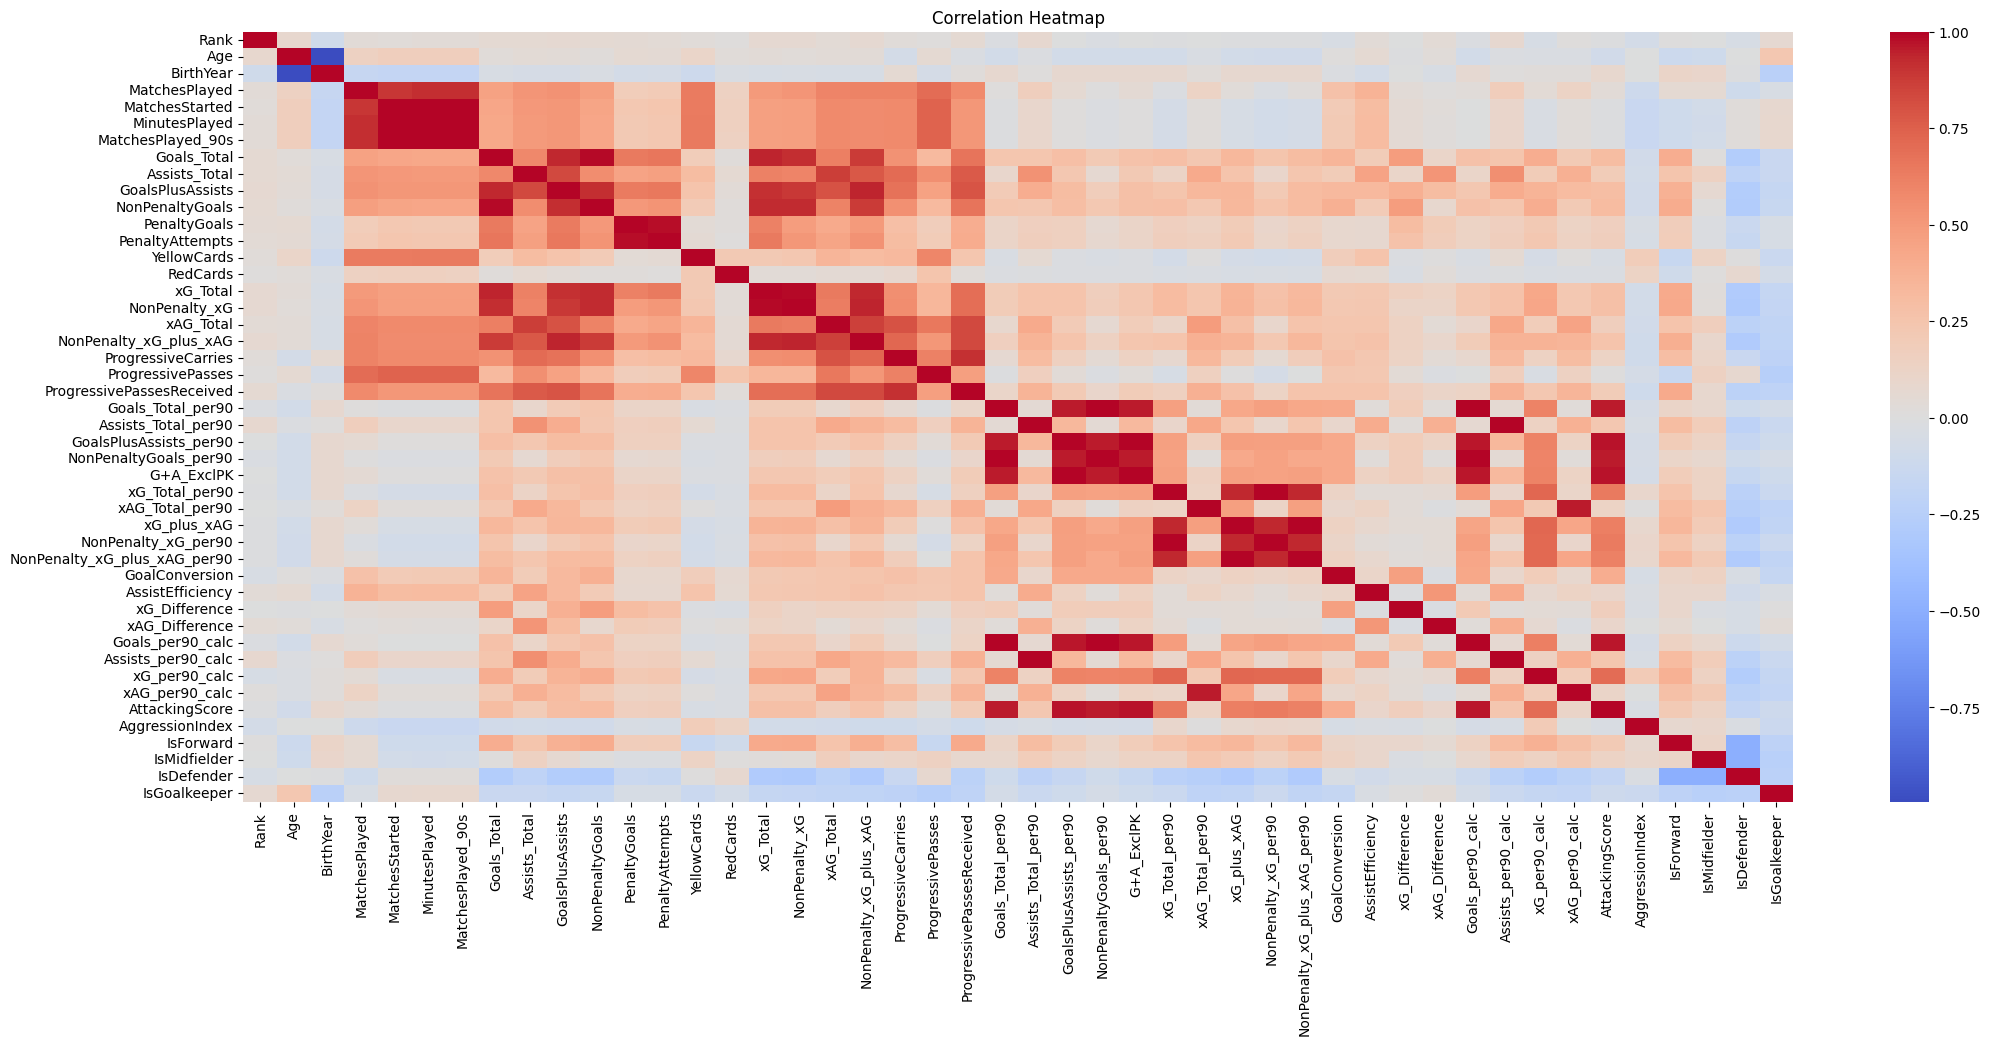

In [57]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Correlation Heatmap – Feature Relationships

This heatmap visualizes the **pairwise correlation** between numerical features in the dataset. Dark red indicates strong positive correlation, while dark blue indicates strong negative correlation.

#### Key Observations:

- **Strong Positive Correlations**:
  - `Goals_Total`, `Assists_Total`, and `xG_Total` are strongly correlated with their respective per90 metrics and the `AttackingScore`.
  - `MatchesPlayed`, `MinutesPlayed`, and `MatchesPlayed_90s` show near-perfect correlations, reflecting consistent playtime metrics.
  - `xG_Total` and `xAG_Total` are positively correlated, indicating players who create good scoring chances often also contribute expected assists.

- **Negative Correlations**:
  - Positional flags show expected inverse relationships, e.g., `IsForward` is negatively correlated with `IsGoalkeeper`.
  - Some weak negative correlations are seen between `AggressionIndex` and attacking stats, suggesting more aggressive players may contribute less offensively.

- **Derived Features**:
  - Custom metrics like `GoalConversion`, `AssistEfficiency`, and `xG_Difference` show varying levels of independence, which may help in segmenting unique player types.
  - `AttackingScore` has strong correlations with both actual and expected per90 contributions, validating it as a solid summarizing metric.




# Data Analysis


#### 1.Which clubs demonstrate the most efficient player utilization in terms of attacking output relative to expected metrics, and how can this inform recruitment or tactical strategy?

In [24]:
# Step 1: Team-Level Efficiency
def safe_divide(a, b):
    return np.where(b != 0, a / b, 0)
    
team_efficiency = df.groupby('Club').agg({
    'Goals_Total': 'sum',
    'xG_Total': 'sum',
    'Assists_Total': 'sum',
    'xAG_Total': 'sum'
}).reset_index()

team_efficiency['GoalConversion'] = safe_divide(team_efficiency['Goals_Total'], team_efficiency['xG_Total'])
team_efficiency['AssistEfficiency'] = safe_divide(team_efficiency['Assists_Total'], team_efficiency['xAG_Total'])
team_efficiency['xG_Diff'] = team_efficiency['Goals_Total'] - team_efficiency['xG_Total']

### Calculating Team-Level Attacking Efficiency

To assess how effectively clubs convert expected contributions into actual output, we aggregated player-level stats into team-level metrics using the following steps:

- **Group by `Club`** and compute total:
  - `Goals_Total`
  - `Assists_Total`
  - `xG_Total` (expected goals)
  - `xAG_Total` (expected assists)

- Derived efficiency metrics:
  - **GoalConversion** = `Goals_Total / xG_Total`: Measures finishing efficiency — how well clubs convert chances into goals.
  - **AssistEfficiency** = `Assists_Total / xAG_Total`: Reflects how effectively teams convert potential assists into actual assists.
  - **xG_Diff** = `Goals_Total - xG_Total`: Quantifies whether clubs over- or under-perform relative to expected goals.

#### `safe_divide` function:
A helper function was used to avoid division-by-zero errors during ratio calculations, ensuring clean and stable output.

This team-level summarization allows identification of clubs with highly efficient or inefficient attacking patterns — critical for strategic insights in recruitment or tactical planning.


C:\Users\agtbe\AppData\Local\Temp\ipykernel_9276\981550194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_efficiency_sorted, x='Club', y='xG_Diff', palette='coolwarm')


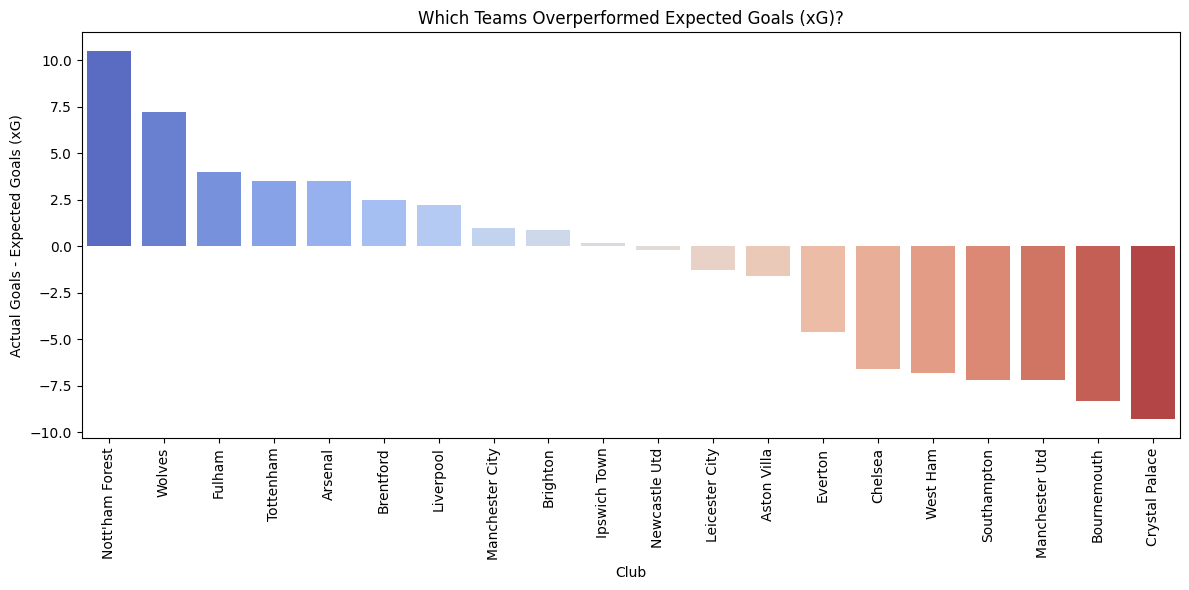

In [25]:
team_efficiency_sorted = team_efficiency.sort_values(by='xG_Diff', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=team_efficiency_sorted, x='Club', y='xG_Diff', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Which Teams Overperformed Expected Goals (xG)?')
plt.ylabel('Actual Goals - Expected Goals (xG)')
plt.xlabel('Club')
plt.tight_layout()
plt.show()

### Which Teams Overperformed Expected Goals (xG)?

The bar chart visualizes the difference between **actual goals scored** and **expected goals (xG)** for each club:

- Positive values indicate **overperformance**: teams scored more than expected based on chance quality.
- Negative values indicate **underperformance**: teams underdelivered despite creating good scoring opportunities.

#### Top Overperformers:
- **Nottingham Forest** and **Wolves** significantly exceeded their xG, suggesting clinical finishing or the influence of a few high-performing individuals.
- **Fulham**, **Tottenham**, and **Arsenal** also demonstrated efficient use of chances.

####  Major Underperformers:
- **Crystal Palace**, **Bournemouth**, and **Manchester United** underperformed most relative to their xG, indicating inefficiency in front of goal or poor finishing.
- **Chelsea** and **West Ham** also fell short, possibly due to tactical issues or misfiring forwards.

#### Tactical Insight:
- **Overperforming teams** may benefit from player momentum or finishing quality and could face regression.
- **Underperforming teams** should reassess their shot quality, forward roles, or tactical setup to capitalize better on chances created.

This analysis is crucial for recruitment, coaching focus, and understanding whether a team is punching above or below its attacking weight.


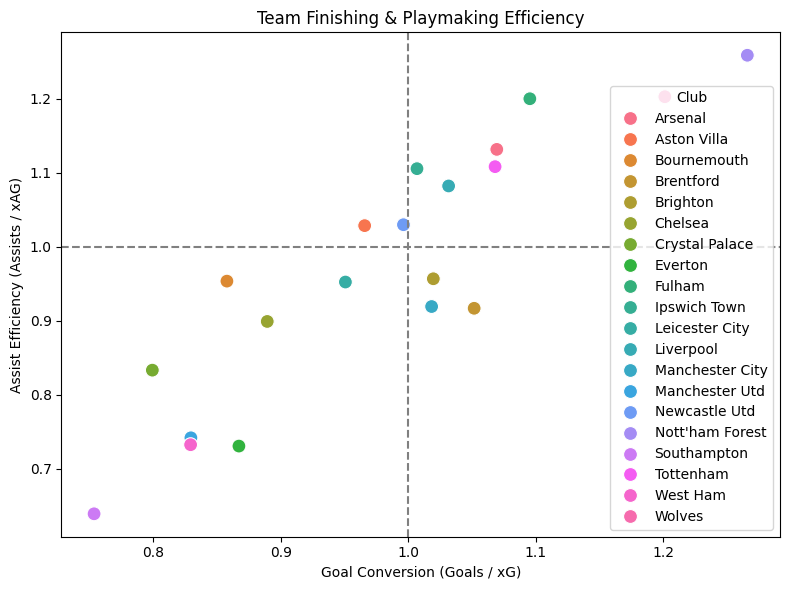

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=team_efficiency, 
    x='GoalConversion', 
    y='AssistEfficiency', 
    hue='Club',
    s=100
)
plt.title('Team Finishing & Playmaking Efficiency')
plt.xlabel('Goal Conversion (Goals / xG)')
plt.ylabel('Assist Efficiency (Assists / xAG)')
plt.axhline(1, color='grey', linestyle='--')
plt.axvline(1, color='grey', linestyle='--')
plt.tight_layout()
plt.show()

This scatter plot visualizes each club's offensive efficiency based on two key metrics:

- **Goal Conversion**: Ratio of actual goals to expected goals (xG)
- **Assist Efficiency**: Ratio of actual assists to expected assists (xAG)

The plot is divided by horizontal and vertical dashed lines at `1.0`, representing the expected baseline:

#### Quadrant Interpretation:

- **Top Right (Efficient Finishers & Creators)**:
  - Clubs here outperform both xG and xAG metrics.
  - Notable teams: **Tottenham**, **Ipswich Town**, and **Wolves** — demonstrating strong finishing and playmaking.

- **Top Left (Efficient Creators, Poor Finishers)**:
  - High assist efficiency but underperform in converting chances.
  - Clubs may be creating quality opportunities but lack clinical finishers.

- **Bottom Right (Efficient Finishers, Poor Creators)**:
  - Convert their limited chances effectively, but may lack creative buildup.
  - Could indicate reliance on individual brilliance or low-xG shot selection.

- **Bottom Left (Underperforming in Both Areas)**:
  - Struggle to both create and convert chances.
  - Teams in this quadrant (e.g., **Southampton**, **West Ham**) may need tactical revision or attacking reinforcement.

#### Insight:
This plot is valuable for talent scouts, analysts, and coaches to:
- Identify overachieving or underperforming teams
- Prioritize improvements in either finishing quality or creative build-up
- Benchmark against high-performing systems like **Tottenham** or **Ipswich Town**

In [27]:
team_efficiency[['Club', 'GoalConversion', 'AssistEfficiency', 'xG_Diff']]\
.sort_values(by='GoalConversion', ascending=False)\
.head(10)

,Club,GoalConversion,AssistEfficiency,xG_Diff
15,Nott'ham Forest,1.265823,1.258741,10.5
19,Wolves,1.201117,1.202749,7.2
8,Fulham,1.095238,1.200000,4.0
0,Arsenal,1.069307,1.131579,3.5
17,Tottenham,1.067961,1.108247,3.5
3,Brentford,1.051546,0.916905,2.5
11,Liverpool,1.031519,1.082164,2.2
4,Brighton,1.019523,0.956790,0.9
12,Manchester City,1.018182,0.919283,1.0
9,Ipswich Town,1.006711,1.105528,0.2


In [28]:
# Step 2: Player Utilization & ROI
high_impact_players = df[
    (df['MatchesPlayed_90s'] < 10) &
    (df['Goals_Total_per90'] > 0.4)
][['Player', 'Club', 'MatchesPlayed_90s', 'Goals_Total_per90', 'AttackingScore']]




This step focuses on uncovering players who deliver **strong attacking returns** despite **limited playtime** — a potential goldmine for clubs in terms of return on investment (ROI) and tactical depth.

#### Filtering Criteria:
- **`MatchesPlayed_90s < 10`**: Players with limited playing time (less than 10 full 90-minute appearances).
- **`Goals_Total_per90 > 0.4`**: Players with above-average goal-scoring efficiency per 90 minutes.

#### Key Fields Selected:
- `Player`: Name of the high-impact individual.
- `Club`: Their current club affiliation.
- `MatchesPlayed_90s`: Total match time standardized to 90-minute units.
- `Goals_Total_per90`: Goal-scoring rate relative to time played.
- `AttackingScore`: A composite performance score incorporating goals, assists, and xG contributions.




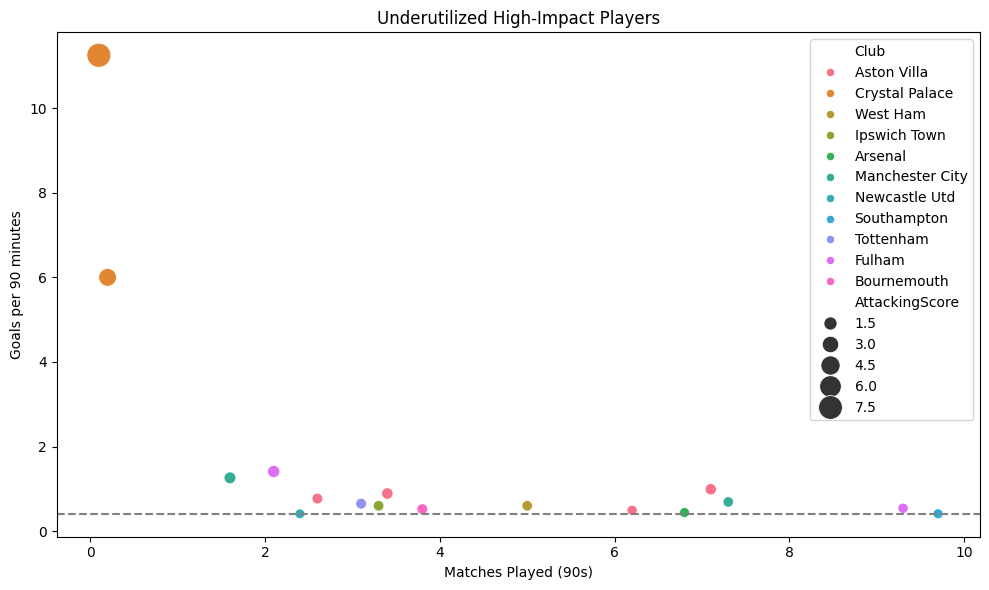

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=high_impact_players,
    x='MatchesPlayed_90s',
    y='Goals_Total_per90',
    hue='Club',
    size='AttackingScore',
    sizes=(50, 300),
    legend='brief'
)
plt.axhline(0.4, linestyle='--', color='grey')
plt.title('Underutilized High-Impact Players')
plt.xlabel('Matches Played (90s)')
plt.ylabel('Goals per 90 minutes')
plt.tight_layout()
plt.show()

### Underutilized High-Impact Players

This bubble chart visualizes players who have shown **high attacking output relative to limited playtime**:

- **X-axis**: Matches played (measured in 90-minute equivalents)
- **Y-axis**: Goals scored per 90 minutes
- **Bubble size**: Represents the player’s **AttackingScore**, a custom metric incorporating goals, assists, and expected contributions
- **Color**: Indicates the player's club

#### Key Insights:

- A few standout players have extremely high `Goals_per90` despite playing fewer than 2 full matches — suggesting immense potential.
- Most players cluster below 1.5 goals per 90, with several between 0.5 and 1.0, already above the average for many positions.
- Larger bubbles at the lower end of `MatchesPlayed_90s` imply **efficient scorers who haven't been fully utilized** — these players could be strategic assets off the bench or in smaller squads.

#### Practical Use:

- **Recruitment & Scouting**: Identify overlooked talent for cost-effective signings.
- **Rotation Strategy**: Clubs may consider increasing minutes for these high-efficiency players.
- **Performance Monitoring**: Track player ROI in terms of goal output relative to playtime.

This chart is ideal for uncovering breakout candidates or reevaluating squad deployment based on productivity rather than raw totals.


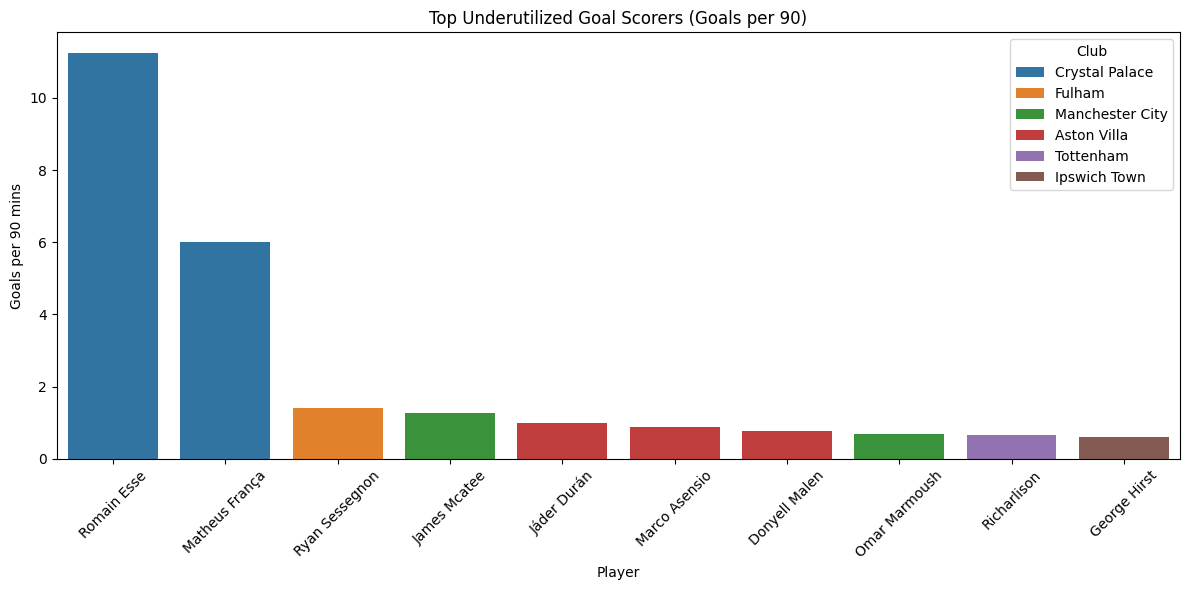

In [30]:
top_impact = high_impact_players.sort_values('Goals_Total_per90', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_impact, x='Player', y='Goals_Total_per90', hue='Club')
plt.title('Top Underutilized Goal Scorers (Goals per 90)')
plt.ylabel('Goals per 90 mins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top Underutilized Goal Scorers (Goals per 90 Minutes)

This bar chart highlights players with the **highest goal-scoring efficiency per 90 minutes**, despite having limited total playtime (under 10 full 90s played).

#### Key Insights:

- **Romain Esse** (Crystal Palace) and **Matheus França** stand out with exceptionally high scoring rates of over **6–11 goals per 90 minutes**, suggesting elite-level finishing in very short bursts of play.
- Other high-efficiency performers include:
  - **Ryan Sessegnon** (Fulham)
  - **James McAtee** (Manchester City)
  - **Jader Durán** and **Marco Asensio** (Aston Villa)
  - **George Hirst** (Ipswich Town)

#### Interpretation:

- These players may be:
  - Young prospects or rotational squad members
  - Late-game impact substitutes
  - Players returning from injury or in transition between roles

#### Tactical/Strategic Value:

- Clubs can explore giving these players more minutes based on data-backed efficiency.
- This analysis supports **data-driven rotation strategies** and **early identification of breakout talent**.

Players with high attacking output per 90 are ideal candidates for:
- Loan recalls
- Increased involvement
- Performance-based contract extensions or transfers


In [31]:
#Over/Under-Performing Teams Table
team_overperf = team_efficiency[['Club', 'Goals_Total', 'xG_Total', 'xG_Diff']]
team_overperf = team_overperf.sort_values('xG_Diff', ascending=False)
display(team_overperf)

,Club,Goals_Total,xG_Total,xG_Diff
15,Nott'ham Forest,50,39.5,10.5
19,Wolves,43,35.8,7.2
8,Fulham,46,42.0,4.0
17,Tottenham,55,51.5,3.5
0,Arsenal,54,50.5,3.5
3,Brentford,51,48.5,2.5
11,Liverpool,72,69.8,2.2
12,Manchester City,56,55.0,1.0
4,Brighton,47,46.1,0.9
9,Ipswich Town,30,29.8,0.2


In [32]:
# Step 4: Tactical Style Comparison
style_metrics = df.groupby('Club').agg({
    'ProgressiveCarries': 'mean',
    'ProgressivePasses': 'mean',
    'xG_Difference': 'mean'
}).reset_index()



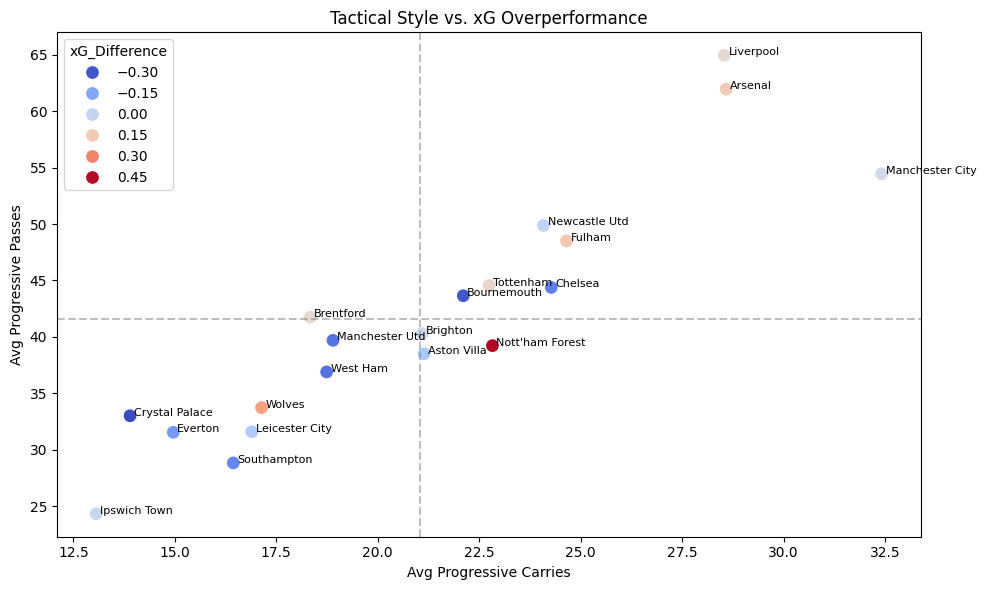

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=style_metrics,
    x='ProgressiveCarries',
    y='ProgressivePasses',
    hue='xG_Difference',
    palette='coolwarm',
    s=100
)

for i, row in style_metrics.iterrows():
    plt.text(row['ProgressiveCarries'] + 0.1, row['ProgressivePasses'], row['Club'], fontsize=8)

plt.title('Tactical Style vs. xG Overperformance')
plt.xlabel('Avg Progressive Carries')
plt.ylabel('Avg Progressive Passes')
plt.axhline(style_metrics['ProgressivePasses'].mean(), linestyle='--', color='grey', alpha=0.5)
plt.axvline(style_metrics['ProgressiveCarries'].mean(), linestyle='--', color='grey', alpha=0.5)
plt.tight_layout()
plt.show()


### Tactical Style vs. xG Overperformance

This scatter plot compares clubs based on their **tactical style** and **expected goal (xG) overperformance** using two key metrics:

- **X-axis**: Average number of **progressive carries** — forward ball movement by dribbling.
- **Y-axis**: Average number of **progressive passes** — passes that significantly advance the ball.
- **Color (Hue)**: Represents each club's **xG_Difference** (Goals - xG), showing over/underperformance.
- **Point Size**: Constant size; labels are added for clarity.

Dashed grey lines indicate the **league average** for both metrics, dividing the chart into four quadrants.

#### Quadrant Breakdown:

- **Top Right (High Carries & High Passes)**:
  - Clubs like **Liverpool**, **Arsenal**, and **Manchester City** play with high progression both through passing and carrying.
  - Notably, Liverpool and Arsenal **overperform xG**, indicating both tactical execution and finishing quality.

- **Bottom Right (High Carries, Low Passes)**:
  - Clubs such as **Brighton** and **Aston Villa** lean more on dribbling or individual movement than passing buildup.

- **Top Left (High Passes, Low Carries)**:
  - **Brentford** and **Manchester United** rely more on structured passing while carrying the ball less.
  - Mixed xG_Difference shows varying effectiveness of these strategies.

- **Bottom Left (Low Progression)**:
  - Clubs like **Ipswich Town**, **Crystal Palace**, and **Southampton** show limited progressive play.
  - Most teams here also underperform xG, suggesting either ineffective tactics or execution gaps.

#### Insights:

- Teams like **Nottingham Forest** and **Aston Villa** stand out for strong xG overperformance despite moderate progression — indicating **finishing efficiency** or opportunistic styles.
- Tactical profiles aligned with strong xG overperformance may inform:
  - **Scouting**: For players suited to specific tactical profiles.
  - **Coaching**: Where to emphasize ball progression or shot quality improvements.
  - **Performance Benchmarking**: Comparing system effectiveness across the league.

This analysis connects **style of play** with **attacking effectiveness**, offering strategic guidance for recruitment, opposition scouting, or tactical refinement.


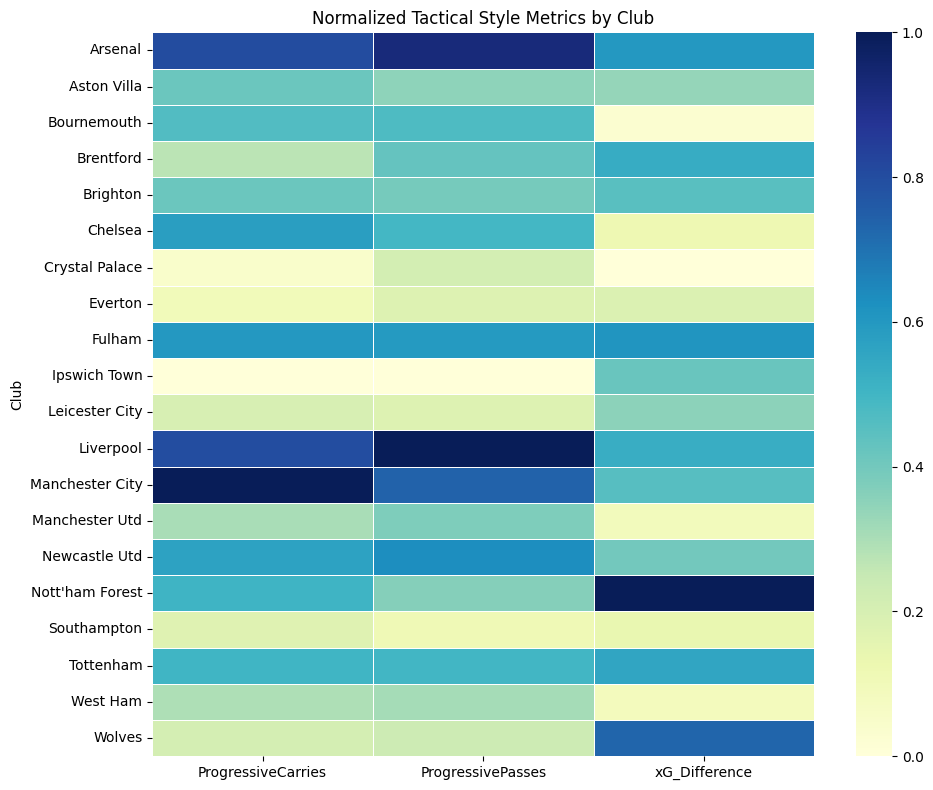

In [34]:
style_norm = style_metrics.set_index('Club').copy()
style_norm = (style_norm - style_norm.min()) / (style_norm.max() - style_norm.min())  # normalize for comparison

plt.figure(figsize=(10, 8))
sns.heatmap(style_norm, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title('Normalized Tactical Style Metrics by Club')
plt.tight_layout()
plt.show()

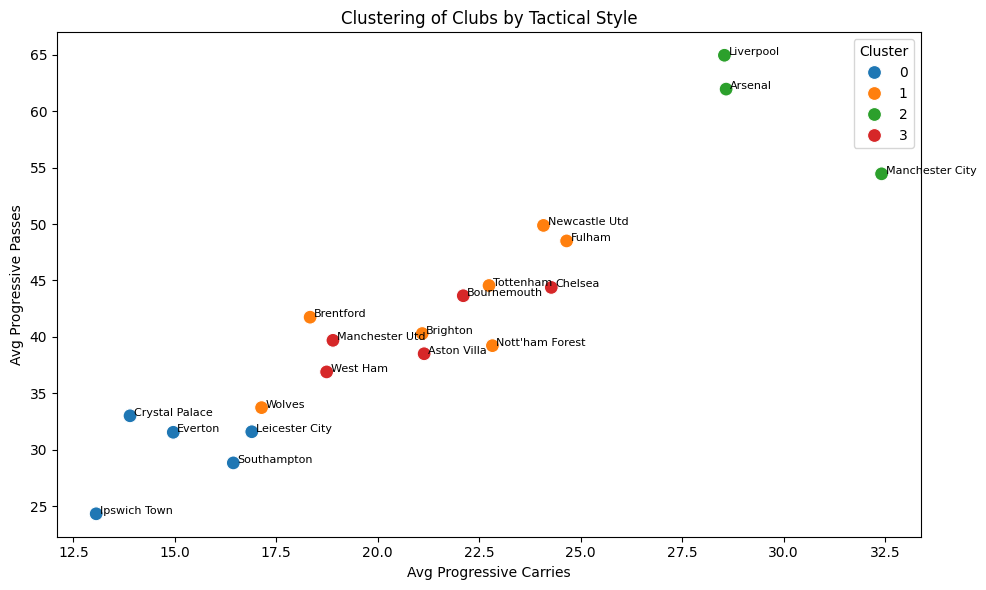

,Club,ProgressiveCarries,ProgressivePasses,xG_Difference,Cluster
9,Ipswich Town,13.062500,24.312500,0.006250,0
16,Southampton,16.441176,28.823529,-0.211765,0
10,Leicester City,16.896552,31.586207,-0.044828,0
6,Crystal Palace,13.896552,33.000000,-0.320690,0
7,Everton,14.961538,31.538462,-0.176923,0
17,Tottenham,22.741935,44.548387,0.112903,1
15,Nott'ham Forest,22.826087,39.217391,0.456522,1
14,Newcastle Utd,24.083333,49.875000,-0.008333,1
19,Wolves,17.137931,33.724138,0.248276,1
4,Brighton,21.096774,40.290323,0.029032,1


In [35]:
X = style_metrics[['ProgressiveCarries', 'ProgressivePasses', 'xG_Difference']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
style_metrics['Cluster'] = kmeans.fit_predict(X_scaled)

# STEP 4: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=style_metrics,
    x='ProgressiveCarries',
    y='ProgressivePasses',
    hue='Cluster',
    palette='tab10',
    s=100
)

# Label clubs
for i, row in style_metrics.iterrows():
    plt.text(row['ProgressiveCarries'] + 0.1, row['ProgressivePasses'], row['Club'], fontsize=8)

plt.title('Clustering of Clubs by Tactical Style')
plt.xlabel('Avg Progressive Carries')
plt.ylabel('Avg Progressive Passes')
plt.tight_layout()
plt.show()

#display clustered table
style_metrics[['Club', 'ProgressiveCarries', 'ProgressivePasses', 'xG_Difference', 'Cluster']]\
    .sort_values('Cluster')\
    .head(10)

### Clustering of Clubs by Tactical Style

To categorize teams based on their stylistic and performance tendencies, we applied **K-Means clustering** using:

- `Avg Progressive Carries`: Ball progression by dribbling
- `Avg Progressive Passes`: Ball progression by passing
- `xG_Difference`: Indicator of offensive over/underperformance (Goals - xG)

#### Preprocessing:
- All features were **standardized** using `StandardScaler` to ensure equal weighting.
- We applied **KMeans with 4 clusters**, grouping clubs with similar tactical and performance profiles.

#### Visual Interpretation:

- **Axes**: Represent playstyle dimensions (progressive carries vs. progressive passes)
- **Color (Hue)**: Cluster label (0–3), assigned by the KMeans algorithm
- **Annotations**: Club names for interpretability

#### Key Observations:

- **Cluster 0**: Teams like **Ipswich Town**, **Southampton**, and **Everton**—low ball progression and negative xG_Difference—suggesting conservative or ineffective attacking styles.
  
- **Cluster 1**: Teams with **balanced progression** and modest xG overperformance, such as **Tottenham**, **Wolves**, and **Nottingham Forest**.
  
- **Cluster 2**: Elite attacking systems like **Liverpool**, **Arsenal**, and **Manchester City**—high progression and strong attacking efficiency.

- **Cluster 3**: Mixed-style clubs such as **Brighton** and **West Ham**, possibly representing transitionary or hybrid tactics.

#### Strategic Use:

- **Benchmarking**: Compare clubs within the same cluster to identify best practices.
- **Tactical Planning**: Understand how teams with similar profiles succeed or struggle.
- **Recruitment**: Target players who fit a cluster’s progression pattern.

Clustering enables a **data-driven lens** into team identity and can help guide opposition scouting, game preparation, or squad building around a defined style.



### Final Insights – Strategic Takeaways for Premier League Stakeholders

The analysis of player efficiency, team-level overperformance, and tactical styles across the Premier League reveals actionable insights for a variety of stakeholders:



#### Club Executives & Directors of Football

- **Unlock Hidden Value**: Several players with limited minutes exhibit elite attacking output (e.g., Romain Esse, Matheus França), offering high return on investment. Prioritize **internal development** before seeking costly transfers.
- **Tactical Benchmarking**: Elite clubs (e.g., Liverpool, Arsenal) combine high progressive actions with xG overperformance. This **data-backed playstyle** can guide **long-term tactical planning** and **coaching recruitment**.
- **Scouting Efficiency**: Cluster analysis highlights stylistic profiles of teams. Clubs can target **players from similar clusters** to minimize adaptation time and improve recruitment accuracy.



#### Analysts & Technical Staff

- **xG Overperformance Isn’t Random**: Teams like Nottingham Forest and Wolves consistently outperform xG despite average progression—warranting deeper tactical breakdowns of their finishing patterns or spacing structures.
- **Tactical Identity Matters**: Clubs that overperform xG while exhibiting strong progression (e.g., Arsenal, Liverpool) highlight the value of a **cohesive system**. Invest in data analysis to model and evolve your own tactical identity.



#### League Officials & Strategic Planners

- **Parallels in Tactical Clusters**: The league exhibits a wide spectrum of tactical models—from low-progression, underperforming sides to elite, high-output systems. Use this segmentation to guide **broadcast narratives, sponsorship alignment**, and **youth development strategies**.
- **Support for Smaller Clubs**: Ipswich Town, Crystal Palace, and others with low progression and underperformance may benefit from **league-funded analytics or coaching programs** to close the performance gap sustainably.



#### Commercial & Marketing Teams

- **Market Star Performers Early**: Under-the-radar high-efficiency players represent storytelling gold for fan engagement and brand differentiation.
- **Tactical Clusters = Content Angles**: Frame matchups not just as rivalries, but as **clashes of styles** (e.g., progressive-pass-heavy vs. dribble-driven teams), fueling **data-driven content and analysis shows**.



### Conclusion

By integrating performance metrics, tactical profiling, and clustering, this analysis provides a comprehensive framework to:
- **Inform football decisions** (tactics, recruitment, player development)
- **Drive commercial strategy** (storytelling, talent positioning)
- **Promote a smarter, more competitive Premier League**





---

#### 2.Which player archetypes exist in the league based on attacking contribution, and how can these clusters inform recruitment or tactical substitutions?

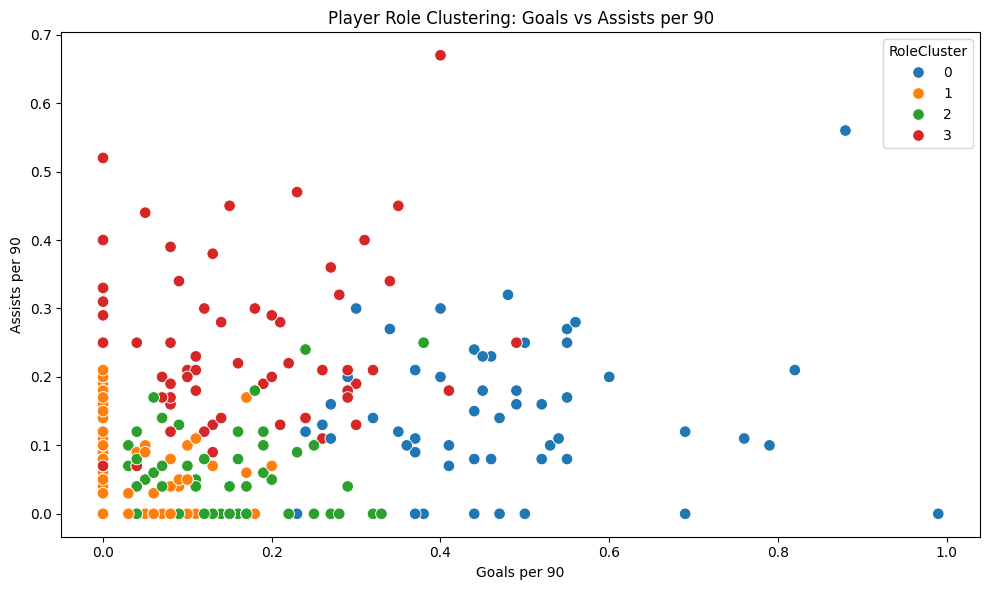

,Player,Club,Goals_Total_per90,xG_Total_per90,Assists_Total_per90,xAG_Total_per90,ProgressiveCarries,ProgressivePasses,GoalConversion,xG_Difference,RoleCluster
244,Nicolas Jackson,Chelsea,0.44,0.56,0.24,0.20,43,30,0.769231,-2.7,0
413,Marcus Rashford,Manchester Utd,0.37,0.16,0.09,0.19,20,21,2.352941,2.3,0
277,Justin Kluivert,Bournemouth,0.56,0.46,0.28,0.22,64,88,1.212121,2.1,0
402,Jaden Philogene Bidace,Ipswich Town,0.38,0.38,0.00,0.05,13,10,1.000000,0.0,0
68,David Brooks,Bournemouth,0.23,0.25,0.00,0.19,25,26,0.909091,-0.2,0
71,Facundo Buonanotte,Leicester City,0.26,0.23,0.13,0.20,37,49,1.111111,0.4,0
534,Danny Welbeck,Brighton,0.45,0.41,0.23,0.06,17,35,1.111111,0.8,0
390,Dango Ouattara,Bournemouth,0.37,0.41,0.21,0.26,67,36,0.909091,-0.7,0
184,Cody Gakpo,Liverpool,0.49,0.37,0.18,0.21,40,46,1.333333,2.0,0
385,Paul Onuachu,Southampton,0.41,0.33,0.10,0.05,7,12,1.250000,0.8,0


In [36]:
features = [
    'Goals_Total_per90',
    'xG_Total_per90',
    'Assists_Total_per90',
    'xAG_Total_per90',
    'ProgressiveCarries',
    'ProgressivePasses',
    'GoalConversion',
    'xG_Difference'
]

# Filter for players with meaningful minutes
player_data = df[df['MatchesPlayed_90s'] >= 5].copy()
X = player_data[features].fillna(0)

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
player_data['RoleCluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Visualize roles (2D projection for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=player_data,
    x='Goals_Total_per90',
    y='Assists_Total_per90',
    hue='RoleCluster',
    palette='tab10',
    s=70
)

plt.title('Player Role Clustering: Goals vs Assists per 90')
plt.xlabel('Goals per 90')
plt.ylabel('Assists per 90')
plt.tight_layout()
plt.show()

# Optional: View sample of clustered players
player_data[['Player', 'Club'] + features + ['RoleCluster']].sort_values('RoleCluster').head(15)

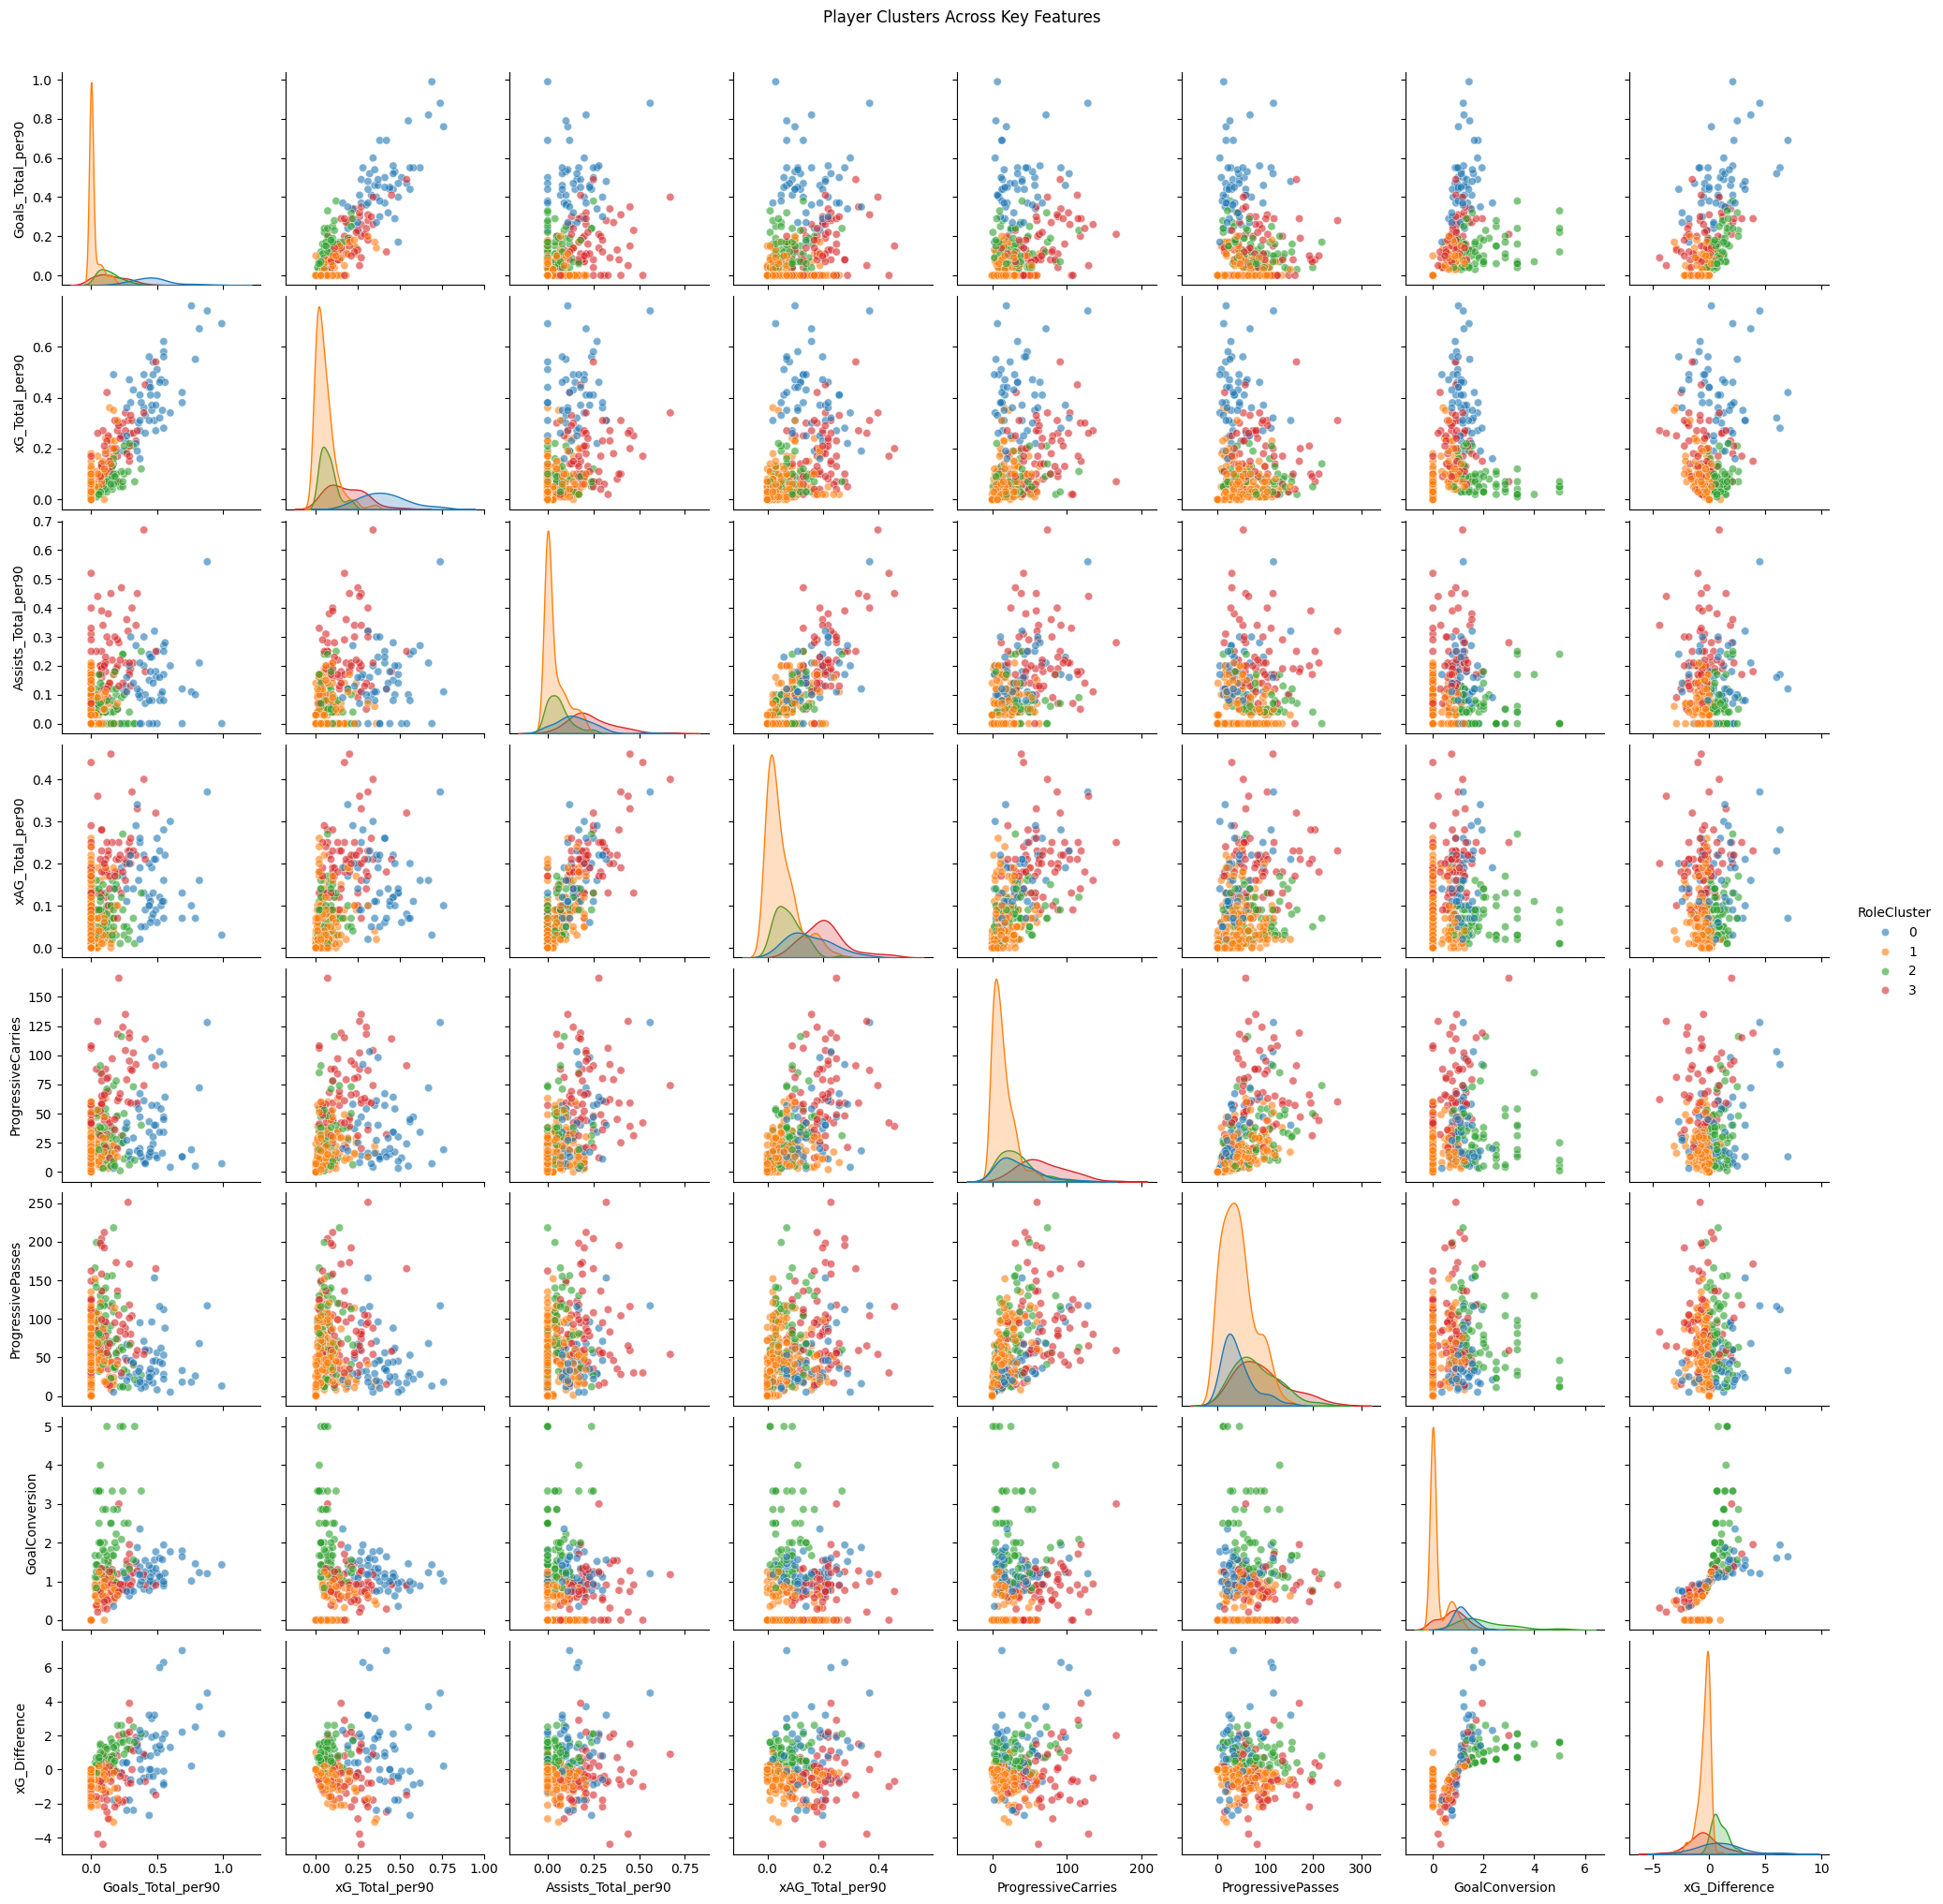

In [37]:
sns.pairplot(
    player_data[features + ['RoleCluster']],
    hue='RoleCluster',
    palette='tab10',
    plot_kws={'alpha': 0.6}
)
plt.suptitle('Player Clusters Across Key Features', y=1.02)
plt.show()


#### 3.How reliant are teams on a small number of players for attacking output, and what are the risks/opportunities of this dependency?

In [38]:
# Total goals by team
team_goals = df.groupby('Club')['Goals_Total'].sum().reset_index(name='TeamGoals')

# Get top 3 scorers per team
top_scorers = df.sort_values('Goals_Total', ascending=False).groupby('Club').head(3)
top_scorers = top_scorers.groupby('Club')['Goals_Total'].sum().reset_index(name='Top3Goals')

# Merge and calculate contribution
reliance_df = pd.merge(team_goals, top_scorers, on='Club')
reliance_df['Top3ContributionRatio'] = reliance_df['Top3Goals'] / reliance_df['TeamGoals']


In [39]:
reliance_df.sort_values('Top3ContributionRatio',ascending=False)

,Club,TeamGoals,Top3Goals,Top3ContributionRatio
3,Brentford,51,37,0.725490
6,Crystal Palace,37,24,0.648649
14,Newcastle Utd,51,33,0.647059
9,Ipswich Town,30,19,0.633333
19,Wolves,43,27,0.627907
11,Liverpool,72,45,0.625000
1,Aston Villa,45,28,0.622222
10,Leicester City,25,15,0.600000
12,Manchester City,56,33,0.589286
15,Nott'ham Forest,50,29,0.580000


C:\Users\agtbe\AppData\Local\Temp\ipykernel_9276\823463235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reliance_df_sorted, x='Club', y='Top3ContributionRatio', palette='coolwarm')


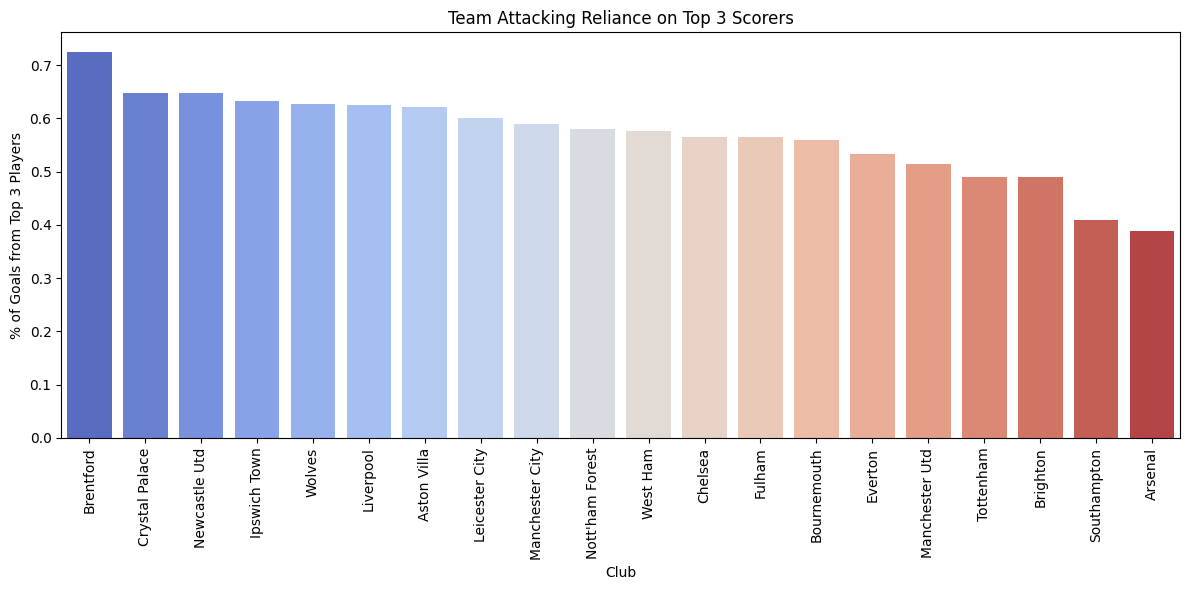

In [40]:
reliance_df_sorted = reliance_df.sort_values('Top3ContributionRatio', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=reliance_df_sorted, x='Club', y='Top3ContributionRatio', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Team Attacking Reliance on Top 3 Scorers')
plt.ylabel('% of Goals from Top 3 Players')
plt.xlabel('Club')
plt.tight_layout()
plt.show()

##### Are clubs too dependent on a single star, or is their attacking output spread out?

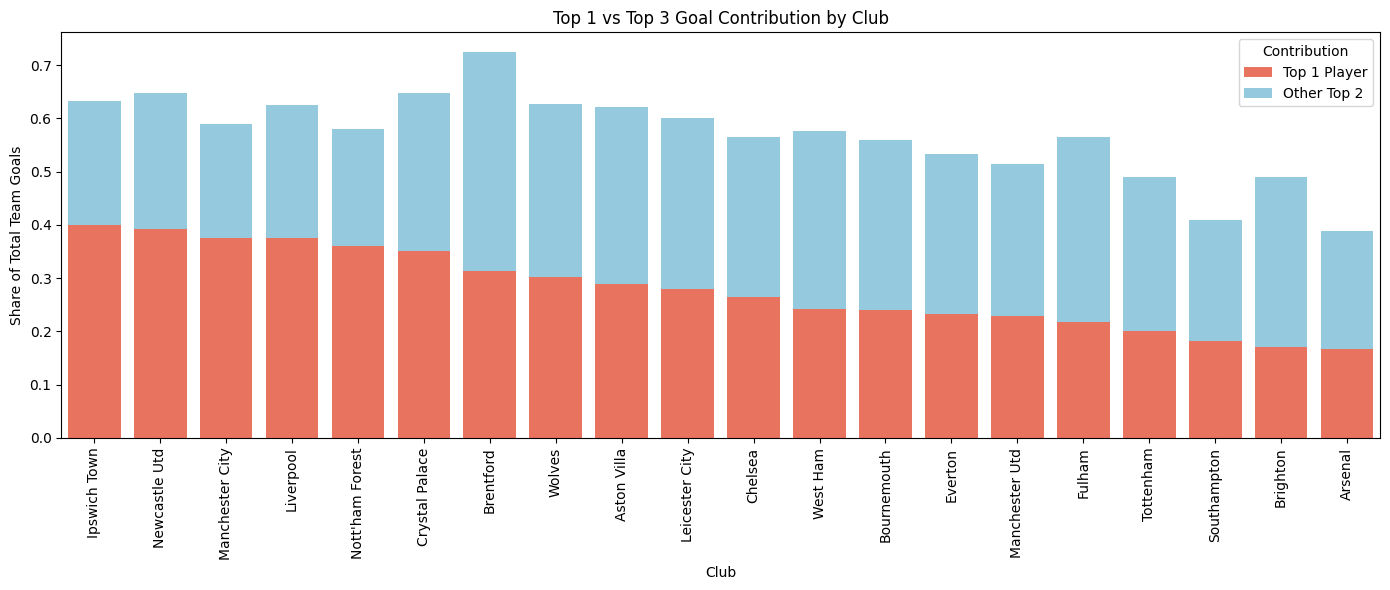

In [41]:
top1 = df.sort_values(['Club', 'Goals_Total'], ascending=[True, False]).groupby('Club').head(1)
top1 = top1.groupby('Club')['Goals_Total'].sum().reset_index(name='Top1Goals')

# Step 3: Top 3 scorers per team
top3 = df.sort_values(['Club', 'Goals_Total'], ascending=[True, False]).groupby('Club').head(3)
top3 = top3.groupby('Club')['Goals_Total'].sum().reset_index(name='Top3Goals')

# Step 4: Merge all together
reliance = team_goals.merge(top1, on='Club').merge(top3, on='Club')
reliance['Top1Ratio'] = reliance['Top1Goals'] / reliance['TeamGoals']
reliance['Top3Ratio'] = reliance['Top3Goals'] / reliance['TeamGoals']
reliance['TopDropoff'] = reliance['Top3Ratio'] - reliance['Top1Ratio']  # how much others contribute after top 1

# Step 5: Plot Top1 vs Top3
reliance_sorted = reliance.sort_values('Top1Ratio', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=reliance_sorted, x='Club', y='Top1Ratio', color='tomato', label='Top 1 Player')
sns.barplot(data=reliance_sorted, x='Club', y='TopDropoff', bottom=reliance_sorted['Top1Ratio'], color='skyblue', label='Other Top 2')

plt.xticks(rotation=90)
plt.title('Top 1 vs Top 3 Goal Contribution by Club')
plt.ylabel('Share of Total Team Goals')
plt.xlabel('Club')
plt.legend(title='Contribution')
plt.tight_layout()
plt.show()

In [42]:
clubs_to_check = ['Crystal Palace', 'Fulham', 'Brighton']

for club in clubs_to_check:
    team_df = df[df['Club'] == club]
    
    # Total team goals
    total_goals = team_df['Goals_Total'].sum()
    
    # Top scorer
    top_scorer = team_df.sort_values('Goals_Total', ascending=False).iloc[0]
    
    player_name = top_scorer['Player']
    player_goals = top_scorer['Goals_Total']
    contribution = player_goals / total_goals if total_goals != 0 else 0

    print(f"{club}")
    print(f"Top Scorer: {player_name}")
    print(f"Goals Scored: {player_goals}")
    print(f"Contribution to Team Goals: {contribution:.2%}")
    print("-" * 40)

Crystal Palace
Top Scorer: Jean-Philippe Mateta
Goals Scored: 13
Contribution to Team Goals: 35.14%
----------------------------------------
Fulham
Top Scorer: Raúl Jiménez
Goals Scored: 10
Contribution to Team Goals: 21.74%
----------------------------------------
Brighton
Top Scorer: Danny Welbeck
Goals Scored: 8
Contribution to Team Goals: 17.02%
----------------------------------------


#### 4. How balanced is goal and assist distribution across player positions, and what does this reveal about tactical systems or player overdependence by role?

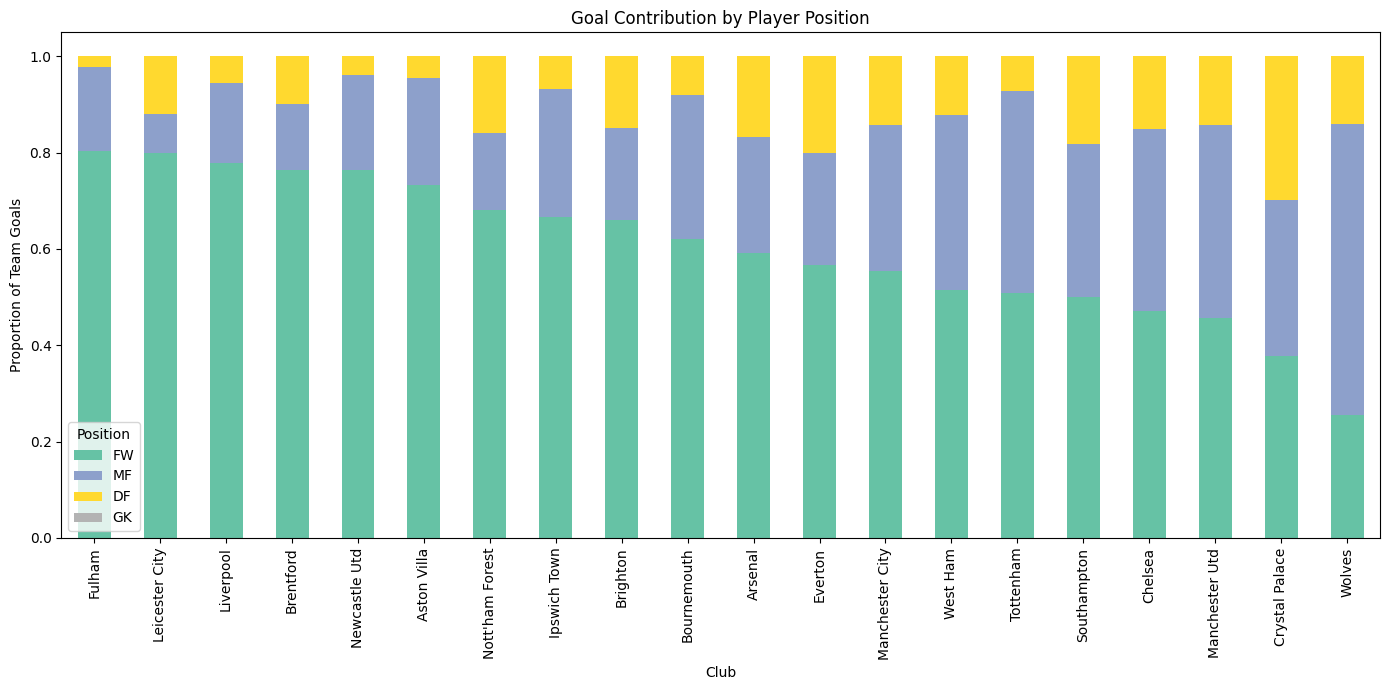

In [43]:
df['MainPosition'] = df['Position'].str.extract(r'(^[A-Z]+)', expand=False)

# Step 2: Group by Club and Position to calculate total goals and assists
position_stats = df.groupby(['Club', 'MainPosition']).agg({
    'Goals_Total': 'sum',
    'Assists_Total': 'sum'
}).reset_index()

# Step 3: Compute team total goals
team_goals = df.groupby('Club')['Goals_Total'].sum().reset_index(name='TeamGoals')
position_stats = position_stats.merge(team_goals, on='Club')

# Step 4: Calculate share of goals from each position
position_stats['GoalContributionRatio'] = position_stats['Goals_Total'] / position_stats['TeamGoals']

# Step 5: Pivot data for visualization
pivot_goals = position_stats.pivot(index='Club', columns='MainPosition', values='GoalContributionRatio').fillna(0)
if set(['FW', 'MF', 'DF', 'GK']).issubset(pivot_goals.columns):
    pivot_goals = pivot_goals[['FW', 'MF', 'DF', 'GK']]

# Step 6: Stacked bar chart
import matplotlib.pyplot as plt

pivot_goals.sort_values('FW', ascending=False, inplace=True)
pivot_goals.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')

plt.title('Goal Contribution by Player Position')
plt.ylabel('Proportion of Team Goals')
plt.xlabel('Club')
plt.xticks(rotation=90)
plt.legend(title='Position')
plt.tight_layout()
plt.show()

#### 4.1 Which midfielders are contributing like forwards?

In [45]:
pivot_goals['StdDev'] = pivot_goals.std(axis=1)
balanced_teams = pivot_goals.sort_values('StdDev')
print(balanced_teams)

MainPosition           FW        MF        DF   GK    StdDev
Club                                                        
Crystal Palace   0.378378  0.324324  0.297297  0.0  0.151539
Southampton      0.500000  0.318182  0.181818  0.0  0.184037
Chelsea          0.471698  0.377358  0.150943  0.0  0.186216
Manchester Utd   0.457143  0.400000  0.142857  0.0  0.187308
West Ham         0.515152  0.363636  0.121212  0.0  0.201586
Everton          0.566667  0.233333  0.200000  0.0  0.203554
Manchester City  0.553571  0.303571  0.142857  0.0  0.205629
Arsenal          0.592593  0.240741  0.166667  0.0  0.216160
Tottenham        0.509091  0.418182  0.072727  0.0  0.217566
Wolves           0.255814  0.604651  0.139535  0.0  0.223926
Bournemouth      0.620000  0.300000  0.080000  0.0  0.240520
Brighton         0.659574  0.191489  0.148936  0.0  0.247425
Nott'ham Forest  0.680000  0.160000  0.160000  0.0  0.257548
Ipswich Town     0.666667  0.266667  0.066667  0.0  0.260768
Aston Villa      0.73333

#### 4.2 Which teams get significant attacking output from defenders?

In [47]:
defenders = df[df['MainPosition'] == 'DF']
top_defenders = defenders[defenders['Goals_Total'] > 2].sort_values('Goals_Total', ascending=False)
print(top_defenders[[
    'Player','Club','Goals_Total'
]])

                Player             Club  Goals_Total
214     Joško Gvardiol  Manchester City            5
109     Marc Cucurella          Chelsea            4
338  Nikola Milenković  Nott'ham Forest            4
357       Daniel Muñoz   Crystal Palace            4
8      Rayan Aït-Nouri           Wolves            3
87     Trevoh Chalobah   Crystal Palace            3
208         Marc Guéhi   Crystal Palace            3
309  Gabriel Magalhães          Arsenal            3


#### Compare position-based goal reliance vs. assist reliance

In [48]:
position_assists = df.groupby(['Club', 'MainPosition'])['Assists_Total'].sum().reset_index()
assist_pivot = position_assists.pivot(index='Club', columns='MainPosition', values='Assists_Total').fillna(0)
assist_pivot = assist_pivot.div(assist_pivot.sum(axis=1), axis=0)  # convert to proportion
print(assist_pivot)

MainPosition           DF        FW        GK        MF
Club                                                   
Arsenal          0.116279  0.604651  0.000000  0.279070
Aston Villa      0.194444  0.527778  0.000000  0.277778
Bournemouth      0.189189  0.405405  0.000000  0.405405
Brentford        0.156250  0.312500  0.031250  0.500000
Brighton         0.129032  0.612903  0.032258  0.225806
Chelsea          0.121951  0.487805  0.000000  0.390244
Crystal Palace   0.379310  0.103448  0.000000  0.517241
Everton          0.315789  0.105263  0.052632  0.526316
Fulham           0.333333  0.435897  0.025641  0.205128
Ipswich Town     0.363636  0.454545  0.000000  0.181818
Leicester City   0.100000  0.550000  0.000000  0.350000
Liverpool        0.203704  0.555556  0.000000  0.240741
Manchester City  0.146341  0.390244  0.073171  0.390244
Manchester Utd   0.173913  0.347826  0.000000  0.478261
Newcastle Utd    0.157895  0.578947  0.000000  0.263158
Nott'ham Forest  0.166667  0.388889  0.000000  0

#### 5. Who are the best-performing young players by position (FW/MF/DF) who aren’t from top clubs, and may be smart value signings?

In [50]:
# Define top clubs to exclude
big_clubs = ['Arsenal', 'Manchester City', 'Liverpool', 'Manchester United', 'Tottenham','Chelsea']

# Filter young, non-big club players with meaningful minutes
young_players = df[
    (df['Age'] <= 23) &
    (~df['Club'].isin(big_clubs)) &
    (df['MatchesPlayed_90s'] >= 5)
].copy()

# Extract broad position label
young_players['PositionGroup'] = young_players['MainPosition'].fillna('')

# Top young forwards
top_fws = young_players[young_players['PositionGroup'] == 'FW'] \
    .sort_values('Goals_Total_per90', ascending=False) \
    [['Player', 'Club', 'Age', 'Goals_Total_per90', 'xG_Total_per90']].head(5)

# Top young midfielders
top_mfs = young_players[young_players['PositionGroup'] == 'MF'] \
    .sort_values('Assists_Total_per90', ascending=False) \
    [['Player', 'Club', 'Age', 'Assists_Total_per90', 'xAG_Total_per90']].head(5)

# Top young defenders
top_dfs = young_players[young_players['PositionGroup'] == 'DF'] \
    .sort_values('Goals_Total_per90', ascending=False) \
    [['Player', 'Club', 'Age', 'Goals_Total_per90', 'xG_Total_per90']].head(5)

# Display results
print("\nTop Young Forwards (Non-Big Clubs):")
display(top_fws)

print("\nop Young Midfielders (Non-Big Clubs):")
display(top_mfs)

print("\nTop Young Defenders (Non-Big Clubs):")
display(top_dfs)



Top Young Forwards (Non-Big Clubs):


,Player,Club,Age,Goals_Total_per90,xG_Total_per90
148,Jáder Durán,Aston Villa,21,0.99,0.69
356,Rodrigo Muniz,Fulham,23,0.79,0.55
122,Liam Delap,Ipswich Town,22,0.46,0.35
81,Fabio Carvalho,Brentford,22,0.40,0.49
253,João Pedro,Brighton,23,0.40,0.36



op Young Midfielders (Non-Big Clubs):


,Player,Club,Age,Assists_Total_per90,xAG_Total_per90
24,Elliot Anderson,Nott'ham Forest,22,0.25,0.13
144,Tommy Doyle,Wolves,23,0.18,0.09
432,Georginio Rutter,Brighton,22,0.16,0.14
240,Tim Iroegbunam,Everton,21,0.16,0.03
174,Mateus Fernandes,Southampton,20,0.12,0.09



Top Young Defenders (Non-Big Clubs):


,Player,Club,Age,Goals_Total_per90,xG_Total_per90
375,Jake O'Brien,Everton,23,0.17,0.06
195,Rodrigo Gomes,Wolves,21,0.15,0.05
230,Jack Hinshelwood,Brighton,20,0.13,0.09
8,Rayan Aït-Nouri,Wolves,23,0.11,0.08
235,Dean Huijsen,Bournemouth,19,0.10,0.08


c:\Users\agtbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\agtbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\agtbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\agtbe\AppData\Local\Temp\ipykernel_9276\2720922320.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ti

<Figure size 1000x4000 with 0 Axes>

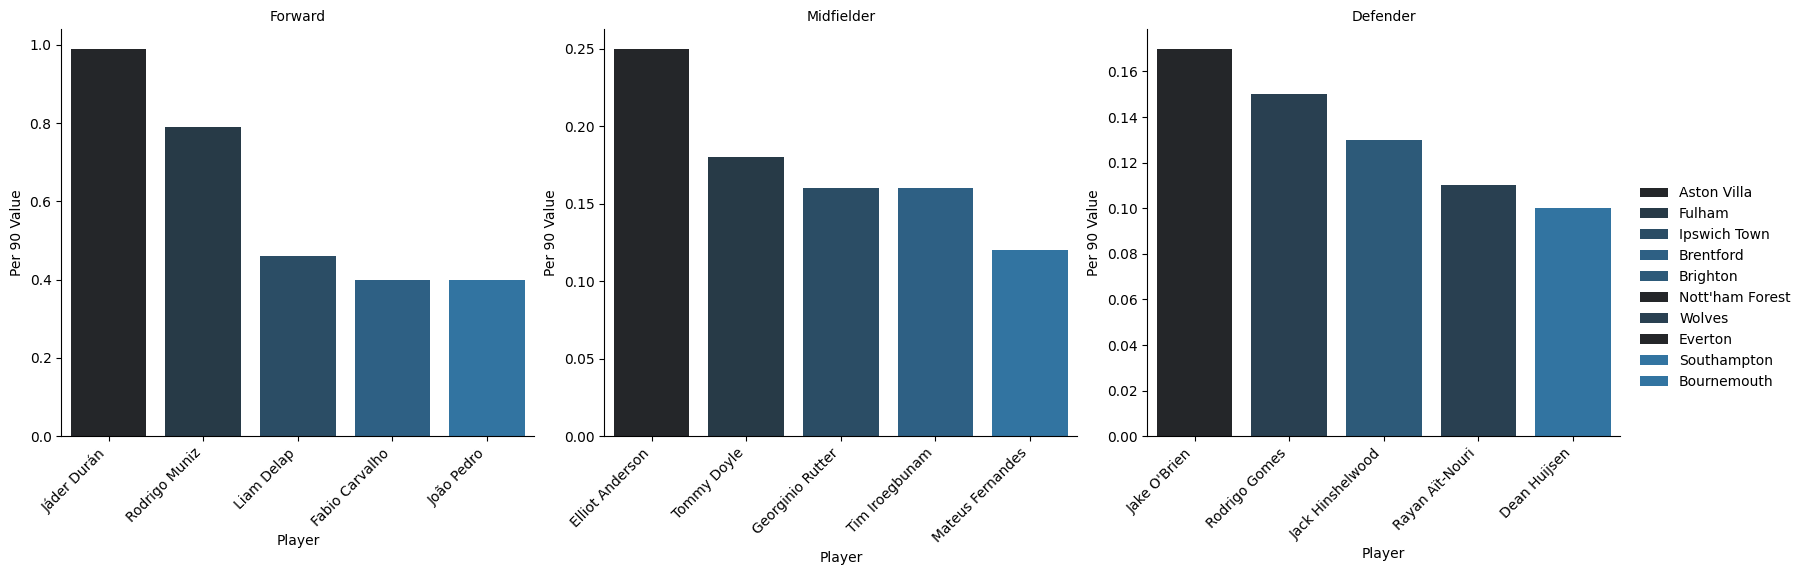

In [56]:
plt.figure(figsize=(10,40))
top_fws['Metric'] = 'Goals per 90'
top_fws['Value'] = top_fws['Goals_Total_per90']
top_fws['Position'] = 'Forward'

top_mfs['Metric'] = 'Assists per 90'
top_mfs['Value'] = top_mfs['Assists_Total_per90']
top_mfs['Position'] = 'Midfielder'

top_dfs['Metric'] = 'Goals per 90'
top_dfs['Value'] = top_dfs['Goals_Total_per90']
top_dfs['Position'] = 'Defender'

# Combine all into one DataFrame
combined_df = pd.concat([top_fws, top_mfs, top_dfs])

# Plot with FacetGrid
g = sns.FacetGrid(combined_df, col='Position', sharex=False, sharey=False, height=5, aspect=1.1)
g.map_dataframe(sns.barplot, x='Player', y='Value', hue='Club', dodge=False)

# Format
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylabel("Per 90 Value")
    ax.set_xlabel("Player")
g.add_legend()
# plt.tight_layout()
plt.show()